# Проект: Линейные модели в машинном обучении

**Задачи:** 
<ul>Cоздать две прогнозные модели для отбора бурёнок в поголовье:
<li>Первая будет прогнозировать возможный удой коровы (целевой признак Удой);</li>
<li>Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).</li>
</ul>
<ul>С помощью модели нужно отобрать коров по двум критериям:
<li>средний удой за год — не менее 6000 килограммов;</li>
<li>молоко должно быть вкусным.</li>
</ul>

## Подключение необходимых библиотек

In [1]:
!pip install scikit-learn==1.1.3 -q

import pandas as pd
import os
import platform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
from sklearn.metrics import (mean_absolute_error, mean_squared_error, confusion_matrix, recall_score,
                             r2_score, precision_score, accuracy_score)
from scipy import stats as st

  You can safely remove it manually.


## Загрузка данных

Прочитаем исходные данные из файлов

In [1539]:
datasets_path='/datasets/'
if platform.system()=='Windows':
    cwd = os.getcwd()
    datasets_path= os.getcwd()+'\\datasets\\'
ferma_main_data= pd.read_csv(datasets_path+'ferma_main.csv', sep=';', decimal = ',')
ferma_dad_data= pd.read_csv(datasets_path+'ferma_dad.csv', sep=';', decimal = ',')
cow_buy_data= pd.read_csv(datasets_path+'cow_buy.csv', sep=';', decimal = ',')

##  Предобработка данных

Выведем общую информацию и первые 5 строк файла ferma_main.csv для контроля загрузки и первого знакомства с данными

In [1540]:
print(ferma_main_data.info())
ferma_main_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


**Замена названий столбцов**

In [1541]:
ferma_main_data.columns=['cow_id', 'milk_yield_kg', 'food_efu', 'food_protein_gr', 'food_spr', 'cow_kind', 'grazing_type', 'cow_parent_kind', 'milk_fat_pct', 'milk_protein_pct', 'milk_taste', 'cow_age']
ferma_main_data.columns

Index(['cow_id', 'milk_yield_kg', 'food_efu', 'food_protein_gr', 'food_spr',
       'cow_kind', 'grazing_type', 'cow_parent_kind', 'milk_fat_pct',
       'milk_protein_pct', 'milk_taste', 'cow_age'],
      dtype='object')

Выведем общую информацию и первые 5 строк файла ferma_dad.csv для контроля загрузки и первого знакомства с данными

In [1542]:
print(ferma_dad_data.info())
ferma_dad_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


**Замена названий столбцов**

In [1543]:
ferma_dad_data.columns=['cow_id', 'cow_parent_name']
ferma_dad_data.columns

Index(['cow_id', 'cow_parent_name'], dtype='object')

Выведем общую информацию и первые 5 строк файла cow_buy_data.csv для контроля загрузки и первого знакомства с данными

In [1544]:
print(cow_buy_data.info())
cow_buy_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
None


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Замена названий столбцов**

In [1545]:
cow_buy_data.columns=['cow_kind', 'grazing_type', 'cow_parent_kind', 'cow_parent_name', 'milk_fat_pct', 'milk_protein_pct', 'cow_age']
cow_buy_data.columns

Index(['cow_kind', 'grazing_type', 'cow_parent_kind', 'cow_parent_name',
       'milk_fat_pct', 'milk_protein_pct', 'cow_age'],
      dtype='object')

### Обработка пропусков и дубликатов, замена типов данных (если потребуется)

#### Проанализируем количество пропусков в данных по столбцам 

In [1546]:
ferma_main_data.isna().sum()

cow_id              0
milk_yield_kg       0
food_efu            0
food_protein_gr     0
food_spr            0
cow_kind            0
grazing_type        0
cow_parent_kind     0
milk_fat_pct        0
milk_protein_pct    0
milk_taste          0
cow_age             0
dtype: int64

In [1547]:
ferma_dad_data.isna().sum()

cow_id             0
cow_parent_name    0
dtype: int64

In [1548]:
cow_buy_data.isna().sum()

cow_kind            0
grazing_type        0
cow_parent_kind     0
cow_parent_name     0
milk_fat_pct        0
milk_protein_pct    0
cow_age             0
dtype: int64

**Вывод: пропусков в данных не обнаружено**

#### Поиск и удаление явных дубликатов

In [1549]:
ferma_main_data.duplicated().sum()

5

In [1550]:
ferma_main_data= ferma_main_data.drop_duplicates().reset_index(drop=True);
f'Осталось явных дубликатов: {ferma_main_data.duplicated().sum()}. Всего строк: {len(ferma_main_data)}'

'Осталось явных дубликатов: 0. Всего строк: 629'

In [1551]:
ferma_dad_data.duplicated().sum()

0

In [1552]:
cow_buy_data.duplicated().sum()

4

Не станем удалять дубликаты у коров на продажу, их идентичность может быть обусловлена округлением измеренных параметров жирности молока, белка и тп.

**Вывод: найдены и удалены явные дубликаты для ferma_main_data, в ferma_dad_data явные дубликаты не обнаружены. В cow_buy_data оставляем все 20 коров.**

#### Поиск неявных дубликатов для значений, заданных строками-перечислениями

In [1553]:
sorted(ferma_main_data['cow_kind'].unique())

['Вис Бик Айдиал', 'РефлешнСоверинг']

In [1554]:
sorted(ferma_main_data['cow_parent_kind'].unique())

['Айдиал', 'Айдиалл', 'Соверин']

Замена значений породы папы быка 'Айдиалл' на 'Айдиал'

In [1555]:
ferma_main_data['cow_parent_kind']= ferma_main_data['cow_parent_kind'].replace('Айдиалл','Айдиал')
sorted(ferma_main_data['cow_parent_kind'].unique())

['Айдиал', 'Соверин']

In [1556]:
sorted(ferma_main_data['grazing_type'].unique())

['Равнинное', 'Равнинные', 'Холмистое']

Замена значений типа пастбища 'Равнинные' на 'Равнинное'

In [1557]:
ferma_main_data['grazing_type']= ferma_main_data['grazing_type'].replace('Равнинные','Равнинное')
sorted(ferma_main_data['grazing_type'].unique())

['Равнинное', 'Холмистое']

In [1558]:
sorted(ferma_main_data['milk_taste'].unique())

['вкусно', 'не вкусно']

In [1559]:
sorted(ferma_main_data['cow_age'].unique())

['более_2_лет', 'менее_2_лет']

In [1560]:
sorted(ferma_dad_data['cow_parent_name'].unique())

['Барин', 'Буйный', 'Геркулес', 'Соловчик']

In [1561]:
sorted(cow_buy_data['cow_kind'].unique())

['Вис Бик Айдиал', 'РефлешнСоверинг']

In [1562]:
sorted(cow_buy_data['grazing_type'].unique())

['равнинное', 'холмистое']

**Приведем данные в таблице cow_buy_data в столбце "Тип пастбища" к тем же значениям, что и в таблице ferma_main_data**

In [1563]:
cow_buy_data['grazing_type']= cow_buy_data['grazing_type'].replace('равнинное','Равнинное')
cow_buy_data['grazing_type']= cow_buy_data['grazing_type'].replace('холмистое','Холмистое')
sorted(ferma_main_data['grazing_type'].unique())

['Равнинное', 'Холмистое']

In [1564]:
sorted(cow_buy_data['cow_parent_kind'].unique())

['Айдиал', 'Соверин']

In [1565]:
sorted(cow_buy_data['cow_parent_name'].unique())

['Барин', 'Буйный', 'Геркулес', 'Соловчик']

In [1566]:
sorted(cow_buy_data['cow_age'].unique())

['более_2_лет', 'менее_2_лет']

**Вывод: найдены и устранены явные и неявные дубликаты в таблицах ferma_main_data и cow_buy_data. Строки-перечисления приведены к единообразному виду.**

**Замена типов данных не требуется, так как при чтении учли разделитель для чисел с плавающей точкой**

## Исследовательский анализ данных

#### Изучим числовые характеристики исходных данных

In [1567]:
ferma_main_data.describe() 

,cow_id,milk_yield_kg,food_efu,food_protein_gr,food_spr,milk_fat_pct,milk_protein_pct
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [1568]:
cow_buy_data.describe() 

,milk_fat_pct,milk_protein_pct
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


#### Анализ распределения значений для характеристик молока

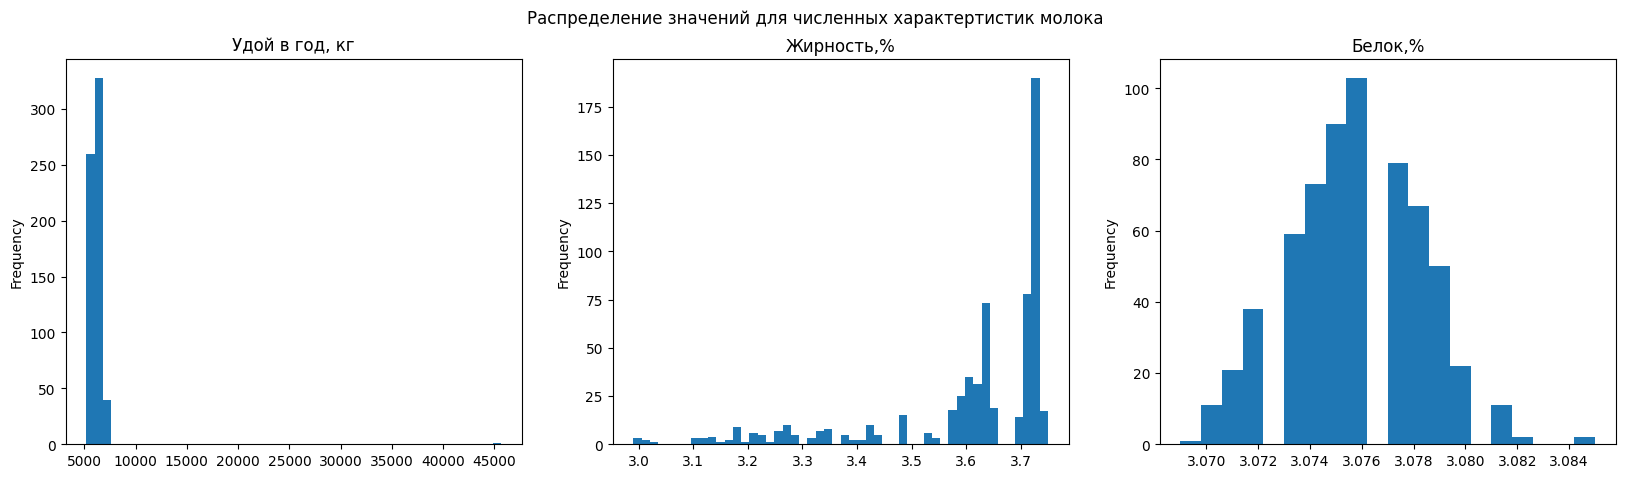

In [1569]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Распределение значений для численных характертистик молока')
ferma_main_data['milk_yield_kg'].plot(
ax=ax1,
bins=50,
kind='hist',
title='Удой в год, кг')
ferma_main_data['milk_fat_pct'].plot(
ax=ax2,
bins=50,
kind='hist',
title='Жирность,%')
ferma_main_data['milk_protein_pct'].plot(
ax=ax3,
bins=20,
kind='hist',
title='Белок,%')
plt.show()

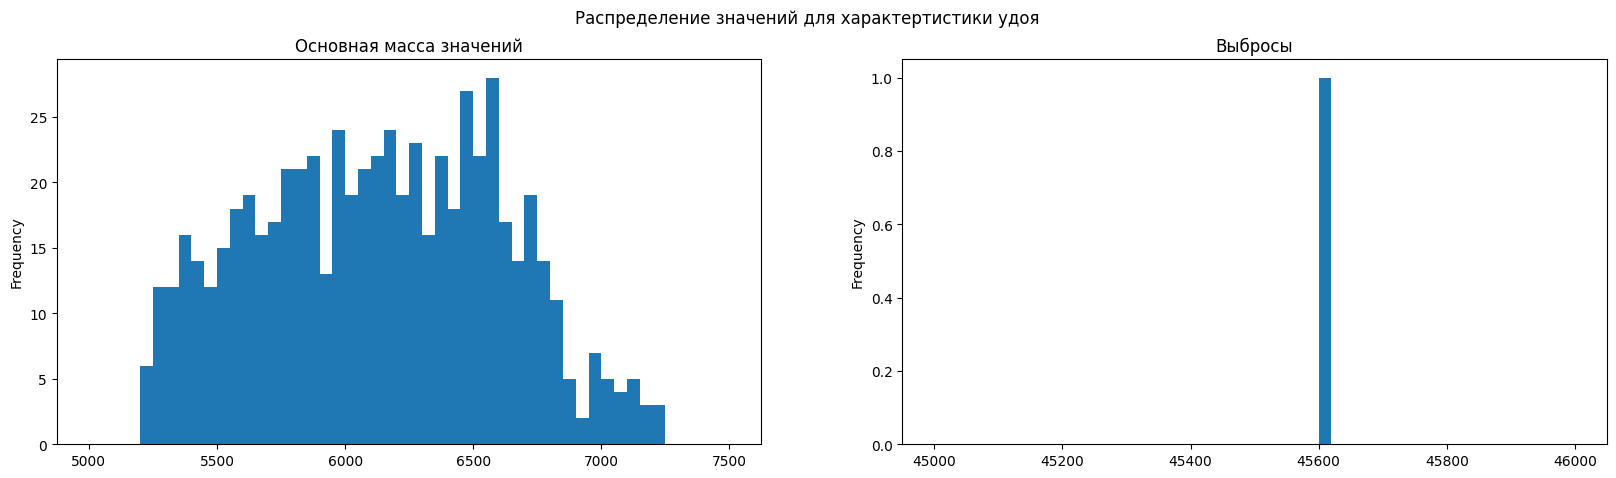

In [1570]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Распределение значений для характертистики удоя')
ferma_main_data['milk_yield_kg'].plot(
ax=ax1,
bins=50,
range=(5000,7500),
kind='hist',
title='Основная масса значений')
ferma_main_data['milk_yield_kg'].plot(
ax=ax2,
bins=50,
range=(45000,46000),
kind='hist',
title='Выбросы')
plt.show()

Ящик с усами для численых характеристик молока

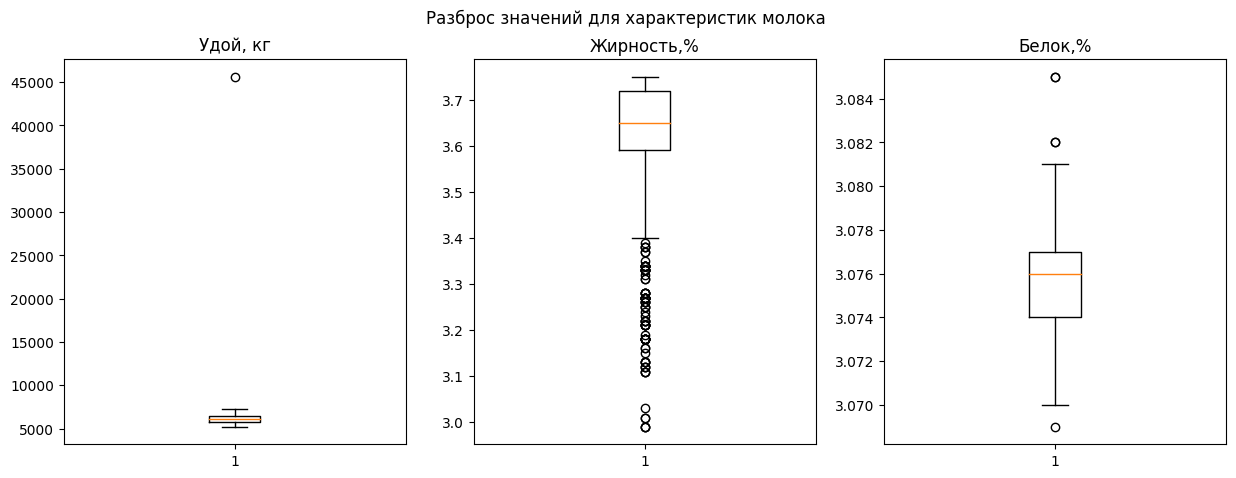

In [1571]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Разброс значений для характеристик молока')
axes[0].boxplot(ferma_main_data['milk_yield_kg'])
axes[1].boxplot(ferma_main_data['milk_fat_pct'])
axes[2].boxplot(ferma_main_data['milk_protein_pct']) 
axes[0].set_title('Удой, кг')
axes[1].set_title('Жирность,%')
axes[2].set_title('Белок,%')
plt.show()

**Вычислим, сколько аномальных значений удоя за пределами верхней границы усов**

Напишем функцию подсчета значений выше верхней границы усов (более 1.5 IQR)

In [1572]:
def get_upper_mustache(df, char_name):
    quartiles = df[char_name].quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    return quartiles[0.75] + 1.5*iqr
def get_upper_values_cnt(df, char_name):
    upper_level= get_upper_mustache(df, char_name)
    return df[df[char_name]>upper_level][char_name].count()

In [1573]:
anomal_values_cnt=get_upper_values_cnt(ferma_main_data, 'milk_yield_kg')
display(anomal_values_cnt)
100*anomal_values_cnt/len(ferma_main_data)#значение в % от общего объема выборки

1

0.1589825119236884

В таблице для удоя ровно один выброс (менее 1% данных), удалим его

In [1574]:
ferma_main_data= ferma_main_data[ferma_main_data['milk_yield_kg']<get_upper_mustache(ferma_main_data, 'milk_yield_kg')]

**Вычислим, сколько аномальных значений жирности за пределами нижней границы усов**

Напишем функцию подсчета значений за пределами нижней границы усов (менее 1.5 IQR)

In [1575]:
def get_lower_mustache(df, char_name):
    quartiles = df[char_name].quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    return quartiles[0.25] - 1.5*iqr
def get_lower_values_cnt(df, char_name):
    lower_level= get_lower_mustache(df, char_name)
    return df[df[char_name]<lower_level][char_name].count()

In [1576]:
anomal_values_cnt=get_lower_values_cnt(ferma_main_data, 'milk_fat_pct')
display(anomal_values_cnt)
100*anomal_values_cnt/len(ferma_main_data)#значение в % от общего объема выборки

86

13.694267515923567

Доля "выбросов" (нежирного молока) велика (более 13% общего объема), удалять такое количество данных пока не станем

**Вычислим, сколько аномальных значений белка за пределами усов**

In [1577]:
anomal_values_lower_cnt=get_lower_values_cnt(ferma_main_data, 'milk_protein_pct') 
anomal_values_upper_cnt=get_upper_values_cnt(ferma_main_data, 'milk_protein_pct') 
display(f'Число значений за пределами: {anomal_values_lower_cnt} ; {anomal_values_upper_cnt}')
pct_lower= 100*anomal_values_lower_cnt/len(ferma_main_data)#значение в % от общего объема выборки
pct_upper= 100*anomal_values_upper_cnt/len(ferma_main_data)#значение в % от общего объема выборки
f'% значений за пределами: {pct_lower} ; {pct_upper}'

'Число значений за пределами: 1 ; 4'

'% значений за пределами: 0.1592356687898089 ; 0.6369426751592356'

В таблице для белка менее 1% данных выбросов, удалим их

In [1578]:
ferma_main_data= ferma_main_data[ferma_main_data['milk_protein_pct']<get_upper_mustache(ferma_main_data, 'milk_protein_pct')]
ferma_main_data= ferma_main_data[ferma_main_data['milk_protein_pct']>get_lower_mustache(ferma_main_data, 'milk_protein_pct')]

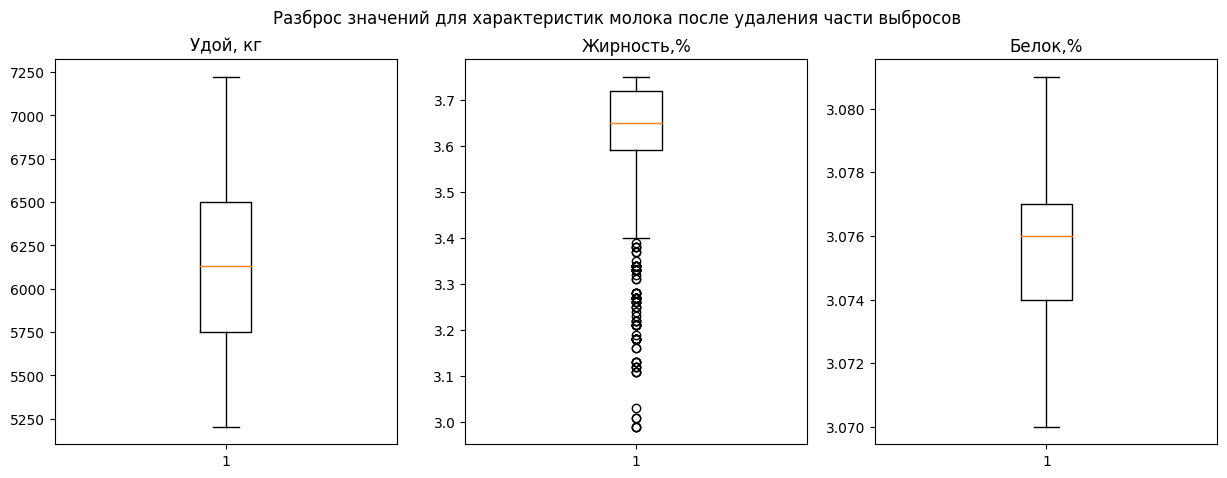

In [1579]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Разброс значений для характеристик молока после удаления части выбросов')
axes[0].boxplot(ferma_main_data['milk_yield_kg'])
axes[1].boxplot(ferma_main_data['milk_fat_pct'])
axes[2].boxplot(ferma_main_data['milk_protein_pct']) 
axes[0].set_title('Удой, кг')
axes[1].set_title('Жирность,%')
axes[2].set_title('Белок,%')
plt.show()

**Вывод: данные для удоя и содержания белка распределены близко к нормальному, выбросы для данных удалены (тк составляли менее 1% данных). Данные о жирности молока распределены по возрастанию частоты, выбросы составляют более 13% данных, не удалялись.**

##### Анализ распределения значений характеристики вкуса молока

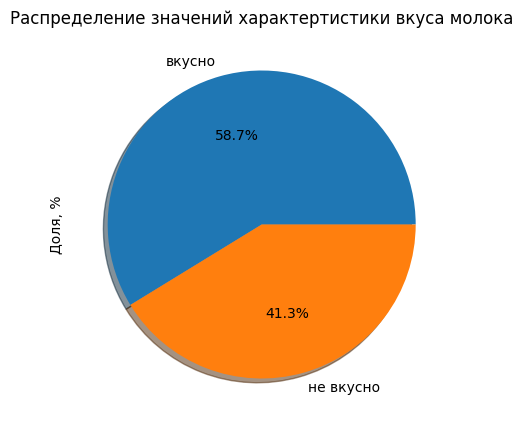

In [1580]:
ferma_main_data.groupby('milk_taste')['milk_taste'].count().plot(
figsize=(5,5),
kind='pie',
autopct='%1.1f%%', 
shadow=True,
ylabel='Доля, %',
title='Распределение значений характертистики вкуса молока')
plt.show()

#### Анализ распределения значений для характеристик корма

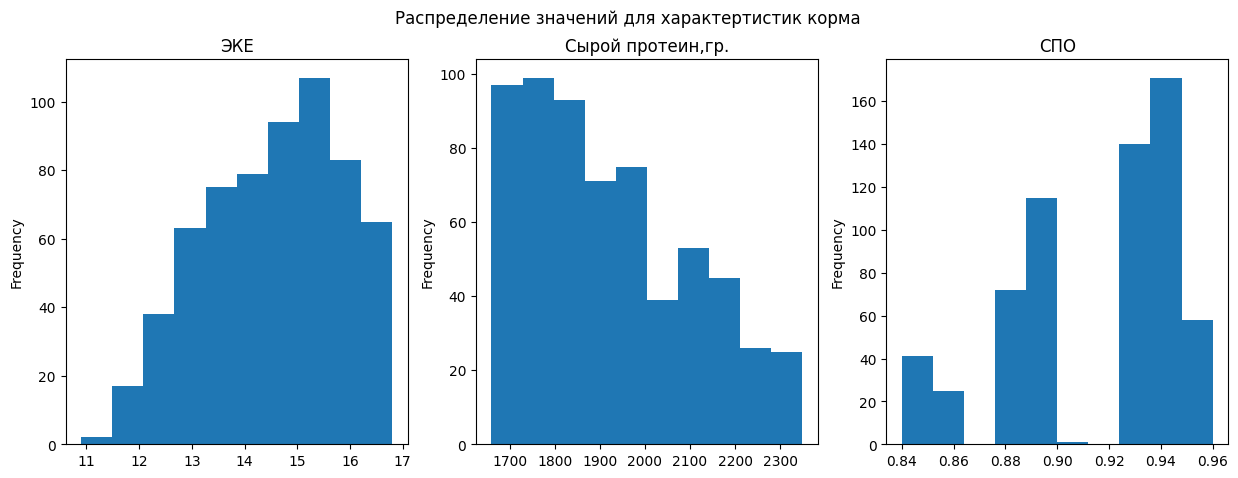

In [1581]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Распределение значений для характертистик корма')
ferma_main_data['food_efu'].plot(
ax=ax1,
kind='hist',
title='ЭКЕ')
ferma_main_data['food_protein_gr'].plot(
ax=ax2,
kind='hist',
title='Сырой протеин,гр.')
ferma_main_data['food_spr'].plot(
ax=ax3,
kind='hist',
title='СПО')
plt.show()

Построим ящики с усами для характеристик корма

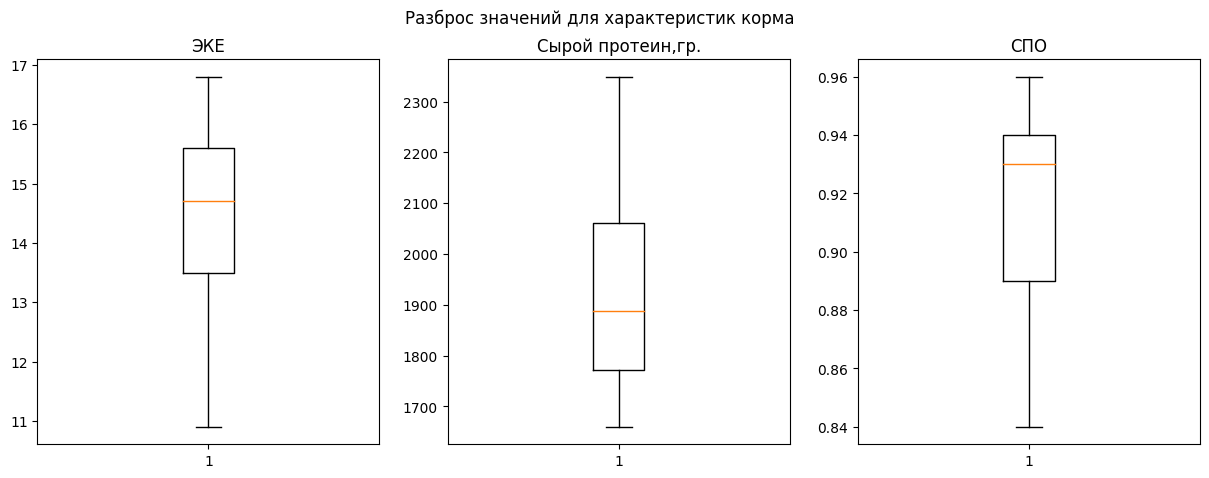

In [1582]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Разброс значений для характеристик корма')
axes[0].boxplot(ferma_main_data['food_efu'])
axes[1].boxplot(ferma_main_data['food_protein_gr']) 
axes[2].boxplot(ferma_main_data['food_spr']) 
axes[0].set_title('ЭКЕ')
axes[1].set_title('Сырой протеин,гр.')
axes[2].set_title('СПО')
plt.show()

**Вывод: для характеристик корма выбросы не замечены, данные распределены необычно только для характеристики "СПО" (несколько вершин в распределении значений). Возможно связано с тем, что кормов всего несколько типов от разных производителей, которые контролируют этот показатель**

#### Алализ распределения значений для характеристик коров

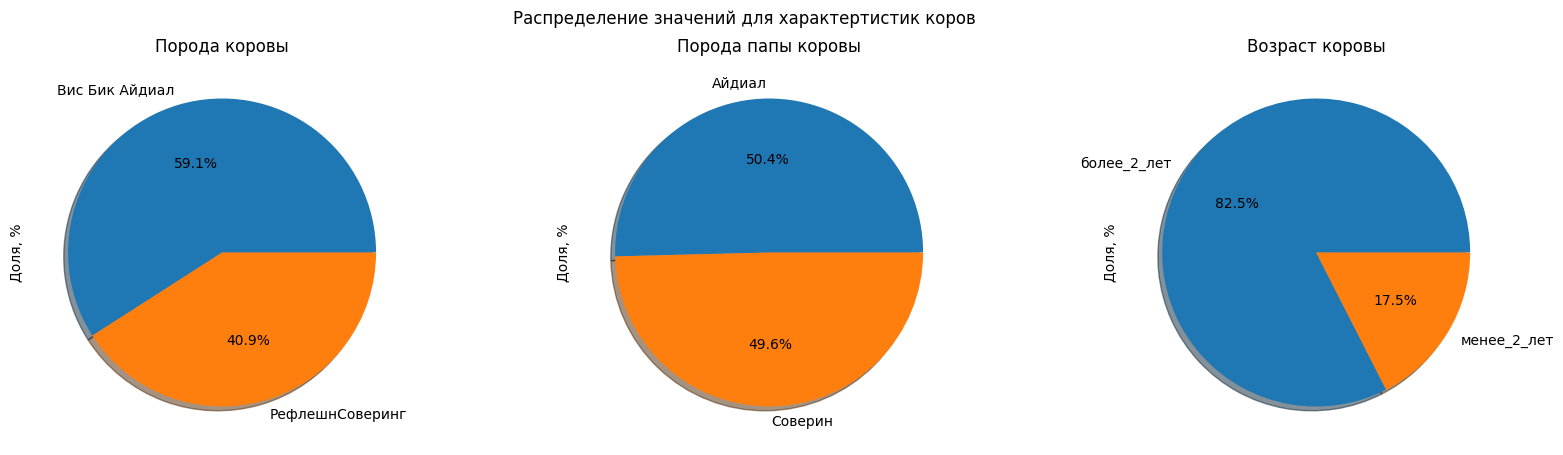

In [1583]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Распределение значений для характертистик коров')
ferma_main_data.groupby('cow_kind')['cow_kind'].count().plot(
ax=ax1,
kind='pie',
autopct='%1.1f%%', 
shadow=True,
ylabel='Доля, %',
title='Порода коровы')
ferma_main_data.groupby('cow_parent_kind')['cow_parent_kind'].count().plot(
ax=ax2,
kind='pie',
autopct='%1.1f%%', 
shadow=True,
ylabel='Доля, %',
title='Порода папы коровы')
ferma_main_data.groupby('cow_age')['cow_age'].count().plot(
ax=ax3,
kind='pie',
ylabel='Доля, %',
autopct='%1.1f%%', 
shadow=True,
title='Возраст коровы')
plt.show()

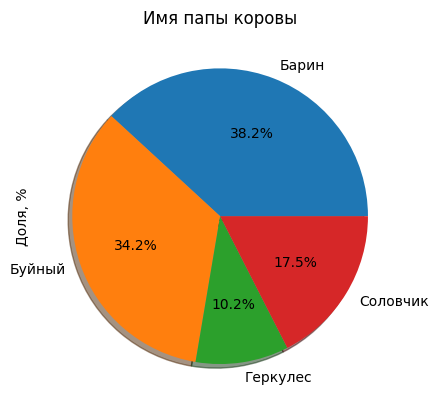

In [1584]:
ferma_dad_data.groupby('cow_parent_name')['cow_parent_name'].count().plot(
kind='pie',
autopct='%1.1f%%', 
shadow=True,
ylabel='Доля, %',
title='Имя папы коровы')
plt.show()

#### Алализ распределения значений для характеристик пастбища

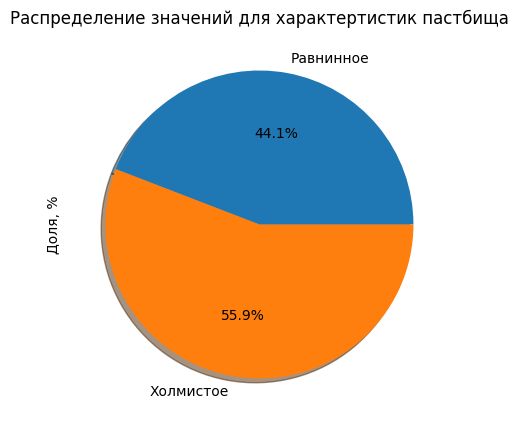

In [1585]:
ferma_main_data.groupby('grazing_type')['grazing_type'].count().plot(
figsize=(5,5),
kind='pie',
autopct='%1.1f%%', 
shadow=True,
ylabel='Доля, %',
title='Распределение значений для характертистик пастбища')
plt.show()

#### Алализ распределения значений для характеристик коров "Экофермы"

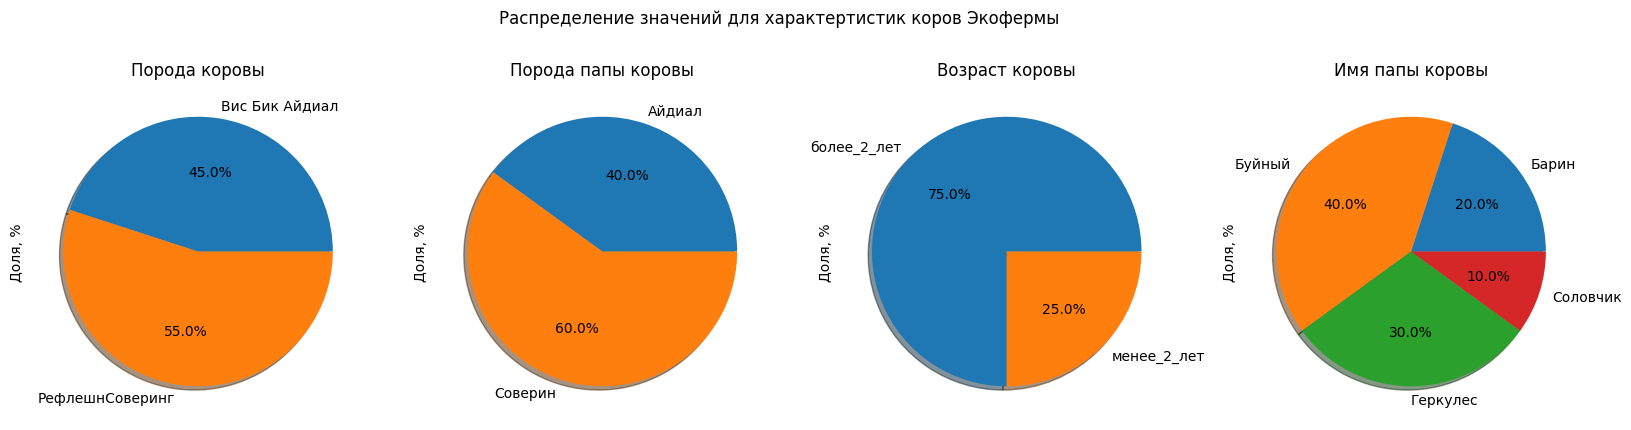

In [1586]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('Распределение значений для характертистик коров Экофермы')
cow_buy_data.groupby('cow_kind')['cow_kind'].count().plot(
ax=ax1,
kind='pie',
autopct='%1.1f%%', 
shadow=True,
ylabel='Доля, %',
title='Порода коровы')
cow_buy_data.groupby('cow_parent_kind')['cow_parent_kind'].count().plot(
ax=ax2,
kind='pie',
autopct='%1.1f%%', 
shadow=True,
ylabel='Доля, %',
title='Порода папы коровы')
cow_buy_data.groupby('cow_age')['cow_age'].count().plot(
ax=ax3,
kind='pie',
ylabel='Доля, %',
autopct='%1.1f%%', 
shadow=True,
title='Возраст коровы')
cow_buy_data.groupby('cow_parent_name')['cow_parent_name'].count().plot(
ax=ax4,
kind='pie',
autopct='%1.1f%%', 
shadow=True,
ylabel='Доля, %',
title='Имя папы коровы')
plt.show()

**Выводы: коровы Экофермы в среднем более молодые (31.2% против 17,5% коров у фермера). Породы Экофермы делятся ровно поровну, тогда как у фермера большую долю составляют коровы породы "Вис Бик Айдиал". При этом для коров Экофермы доля   породы "Соверин" для папы коровы меньше, чем "Айдиал", тогда как у фермера соотношение практически поровну. Большую долю среди коров Экофермы составляют потомки быка "Геркулес", и меньшую "Барин" и примерно ту же долю коровы от "Буйного".** 

#### Алализ распределения значений для характеристик пастбища для коров "Экофермы"

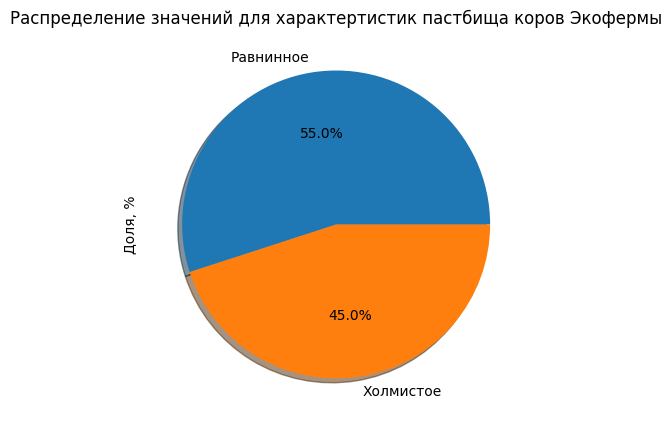

In [1587]:
cow_buy_data.groupby('grazing_type')['grazing_type'].count().plot(
figsize=(5,5),
kind='pie',
autopct='%1.1f%%', 
shadow=True,
ylabel='Доля, %',
title='Распределение значений для характертистик пастбища коров Экофермы')
plt.show()

**Вывод: соотношение пастбищ на Экоферме ровно 50/50, тогда как у фермера больше коров с холмистых пастбищ**

#### Анализ распределения значений характеристик молока для коров "Экофермы"

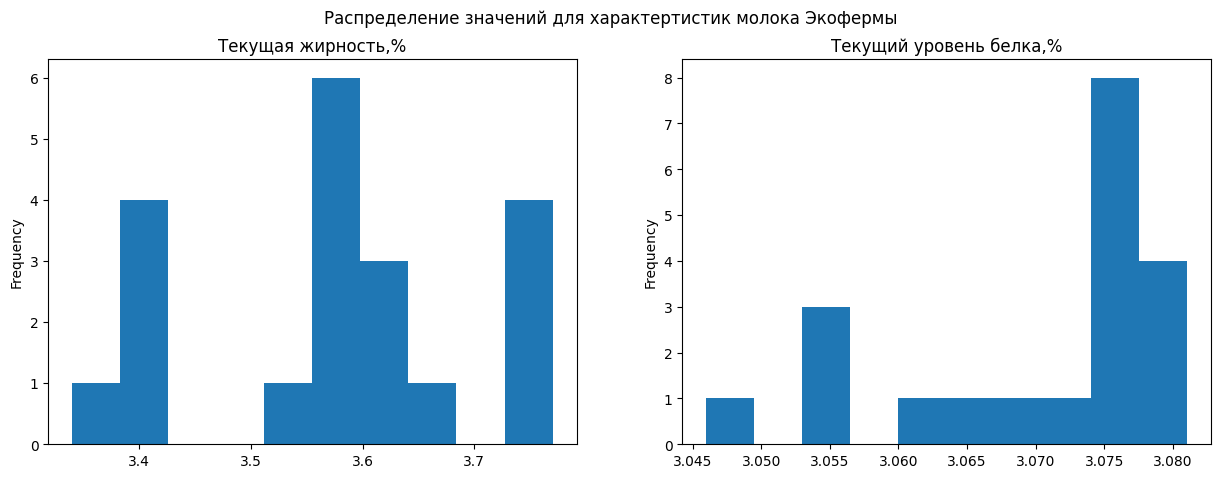

In [1588]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Распределение значений для характертистик молока Экофермы')
cow_buy_data['milk_fat_pct'].plot(
ax=ax1,
kind='hist',
title='Текущая жирность,%')
cow_buy_data['milk_protein_pct'].plot(
ax=ax2,
kind='hist',
title='Текущий уровень белка,%')
plt.show()

Ящик с усами для характеристик молока Экофермы

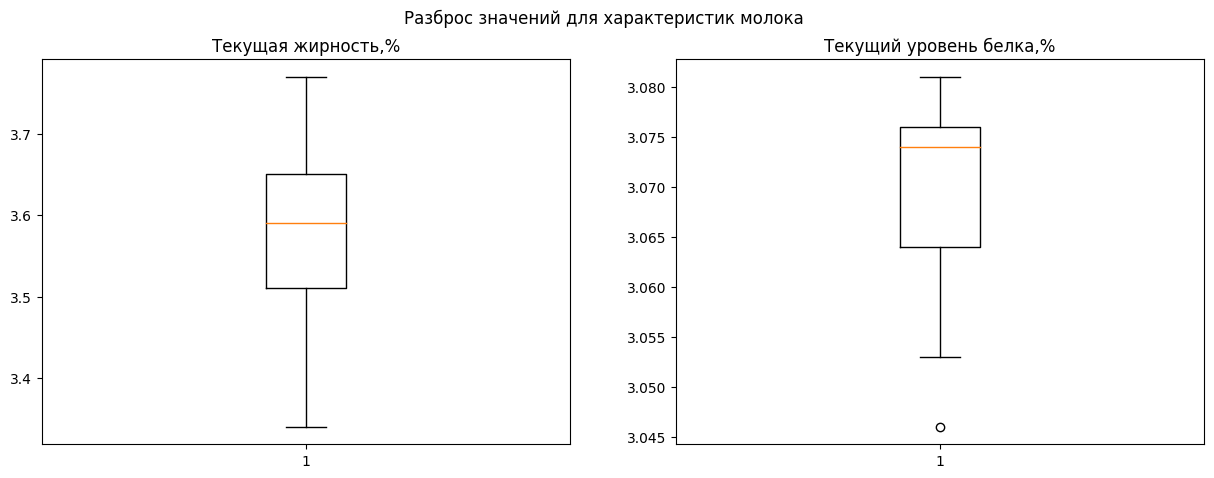

In [1589]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Разброс значений для характеристик молока')
axes[0].boxplot(cow_buy_data['milk_fat_pct'])
axes[1].boxplot(cow_buy_data['milk_protein_pct']) 
axes[0].set_title('Текущая жирность,%')
axes[1].set_title('Текущий уровень белка,%')
plt.show()

**Выводы: характеристики молока Экофермы распределены равномерно, без выбросов, улучшения не требуются**

## Корреляционный анализ

Рассчитаем коэффициенты и визуализируем корреляции Спирмана (так как не все данные распределены согласно нормальному закону) между всеми численными признаками в ferma_main_data

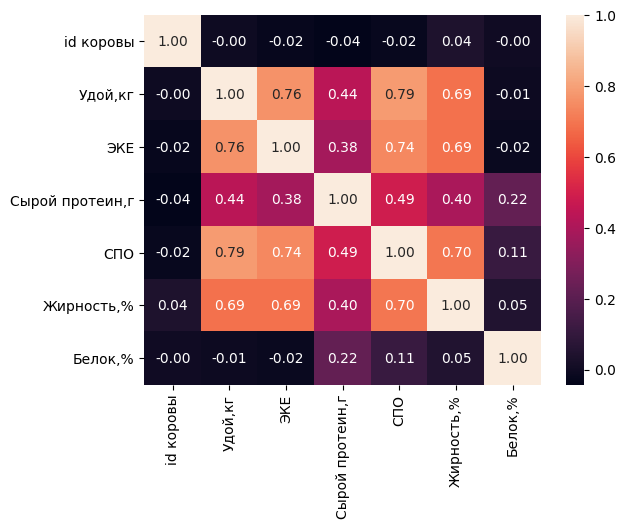

In [1590]:
feature_names = ['id коровы', 'Удой,кг', 'ЭКЕ', 'Сырой протеин,г', 'СПО', 'Жирность,%', 'Белок,%']
axes= sns.heatmap(ferma_main_data.corr(method='spearman'), annot=True, fmt='.2f', xticklabels=feature_names, yticklabels=feature_names) 
plt.show()

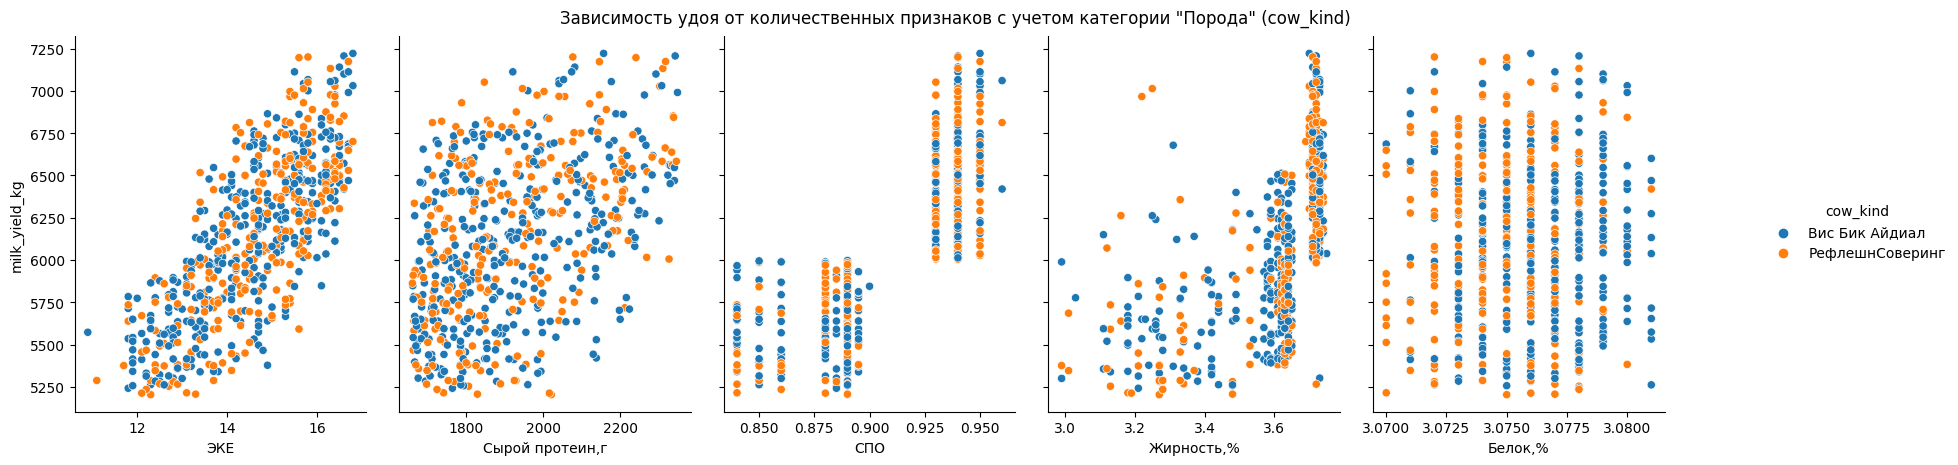

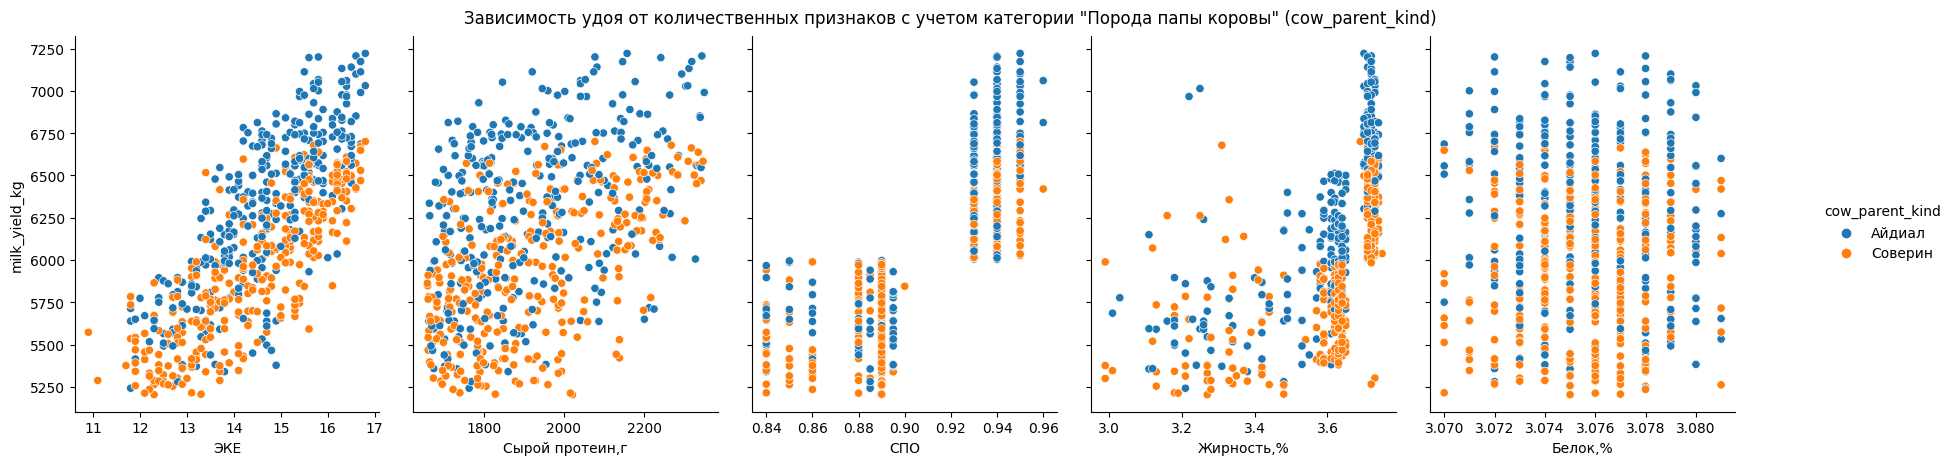

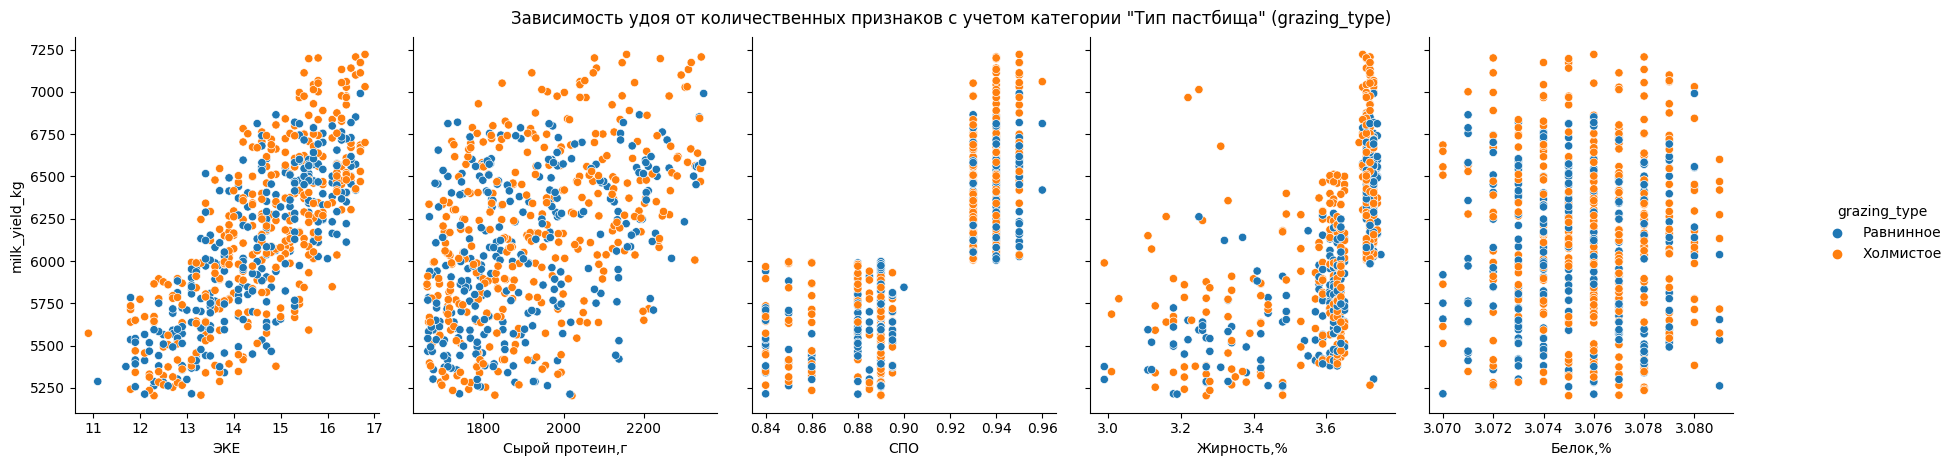

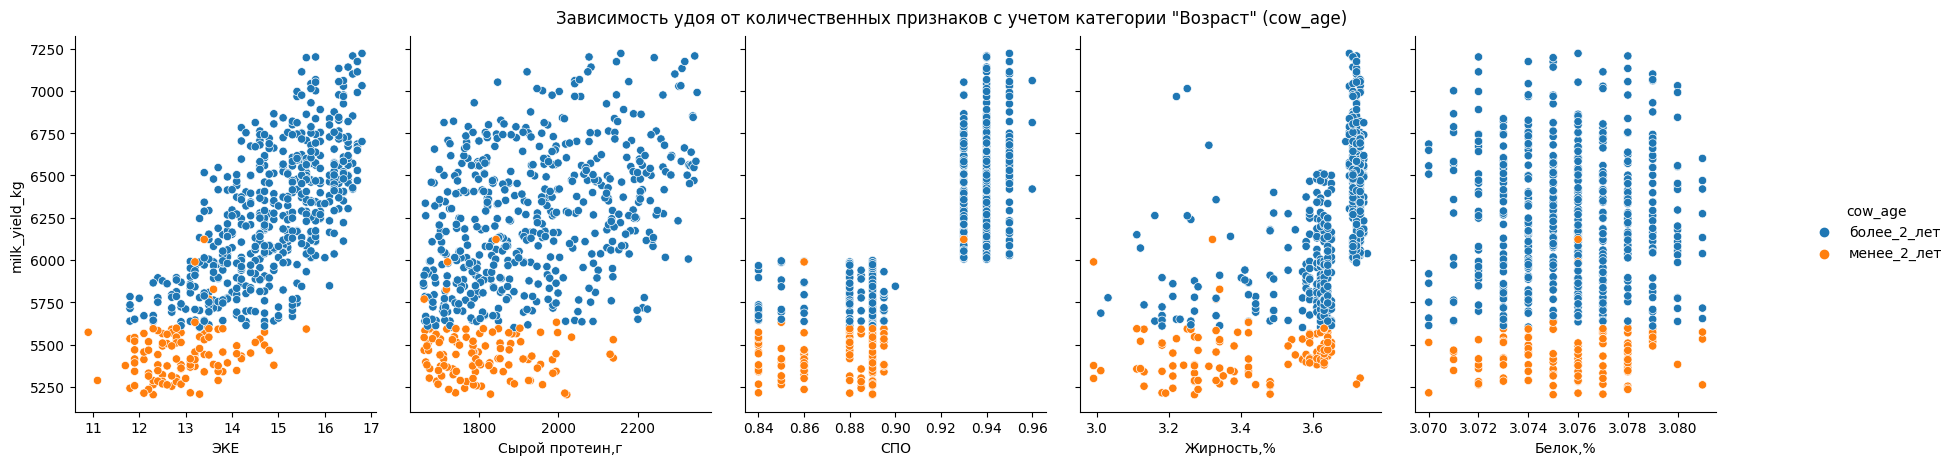

In [1591]:
cat_values= ['cow_kind', 'cow_parent_kind', 'grazing_type', 'cow_age']
feature_names = ['ЭКЕ', 'Сырой протеин,г', 'СПО', 'Жирность,%', 'Белок,%']
cat_titles = {'cow_kind':'Порода', 'cow_parent_kind':'Порода папы коровы', 'grazing_type':'Тип пастбища', 'cow_age':'Возраст'} 
for value in cat_values:
    axes= sns.pairplot(ferma_main_data, x_vars=['food_efu', 'food_protein_gr', 'food_spr', 'milk_fat_pct', 'milk_protein_pct'] , y_vars='milk_yield_kg', hue=value)
    axes.fig.set_size_inches(20,5)
    for ax, feature_name in zip(axes.axes.flatten(), feature_names):
        ax.set_xlabel(feature_name);
    plt.suptitle(f'Зависимость удоя от количественных признаков с учетом категории "{cat_titles[value]}" ({value})', va='bottom')
    plt.show()

**Выводы: между всеми входными признаками (кроме содержания белка в молоке) и целевым признаком удоя есть умеренная (для "содержания сырого протеина"), заметная (для "жирности молока"), либо высокая прямая корреляция (для "ЭКЕ" и "СПО").
Для содержания белка в молоке корреляциии между входным и целевым признаком не наблюдается, что подтверждается диаграммой рассеяния. Судя по коэффциентам корреляции, мультиколлинеарности между входными признаками нет (все значения менее  0,9 по модулю). Зависимость от сырого протеина в корме слабая и не выглядит линейной. Зависимость удоя от ЭКЕ нелинейная, напоминает правую часть параболы. Чтобы устранить нелинейность, можно ввести новый признак "ЭКЕ в квадрате". СПО и удой также связаны нелинейно, сгруппированы в 2 кластера. Чтобы устранить нелинейность, можно преобразовать СПО в категориальный бинарный признак, используя визуально найденную границу между кластерами СПО= 0.91.**

## Обучение модели линейной регрессии

### Обучение первой модели

Отберем следующие признаки для обучения первой модели: "порода коровы", "порода папы коровы", "возраст коровы", "тип пастбища", "ЭКЕ", "СПО", "сырой протеин". Другие признаки (относящиеся к молоку) не являются входными.

In [1592]:
X = ferma_main_data.drop(['milk_yield_kg','milk_fat_pct','milk_protein_pct', 'milk_taste'], axis=1)
y = ferma_main_data['milk_yield_kg']

Разделим данные на тренировочную и тестовую выборки

In [1593]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
display(X_train1.head())
display(X_test1.head())
display(y_train1.head())
y_test1.head() 

,cow_id,food_efu,food_protein_gr,food_spr,cow_kind,grazing_type,cow_parent_kind,cow_age
190,191,16.6,1966,0.96,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет
210,211,16.4,1894,0.94,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
139,140,14.1,1977,0.89,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
271,272,13.4,1775,0.88,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет
587,588,14.7,1671,0.88,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет


,cow_id,food_efu,food_protein_gr,food_spr,cow_kind,grazing_type,cow_parent_kind,cow_age
252,253,13.7,1945,0.89,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
564,565,11.9,1662,0.84,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
176,177,16.5,2082,0.94,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет
283,284,13.9,1732,0.88,Вис Бик Айдиал,Холмистое,Соверин,более_2_лет
112,113,15.8,1715,0.93,Вис Бик Айдиал,Холмистое,Соверин,более_2_лет


190    6420
210    6723
139    5833
271    5971
587    5610
Name: milk_yield_kg, dtype: int64

252    5754
564    5542
176    7141
283    5770
112    6345
Name: milk_yield_kg, dtype: int64

Закодируем категориальные признаки с помощью OneHotEncoder, передадим экодеру параметры для избегания дамми-ловушки и пропуска неизвестных значений признаков (которые есть в тестовой выборке, но нет в обучающей)

In [1594]:
encoder1 = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['cow_kind', 'cow_parent_kind', 'grazing_type', 'cow_age']

# обучит и преобразуем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder1.fit_transform(X_train1[cat_col_names]) 
# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder1.transform(X_test1[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder1.get_feature_names_out() 

# создадим датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
display(X_train_ohe.head())
display(X_test_ohe.head())

,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет
0,1.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0


Масштабируем количественные признаки с помощью StandardScaler

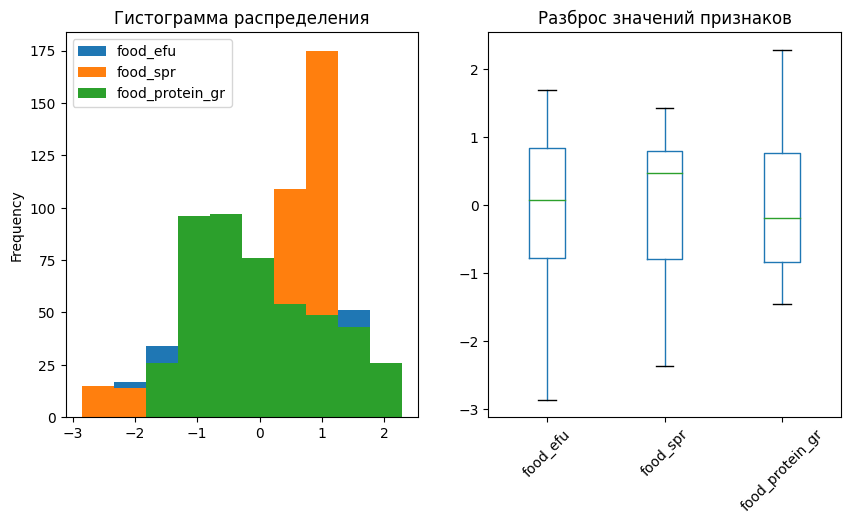

In [1595]:
num_col_names = ['food_efu',	
                 'food_spr',
                 'food_protein_gr']

scaler1 = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler1.fit_transform(X_train1[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler1.transform(X_test1[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train1 = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test1 = pd.concat([X_test_ohe, X_test_scaled], axis=1)
# построим графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами чтобы убедиться, что масштабирование прошло правильно
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train1[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train1[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Обучим модель линейной регрессии на подготовленных данных и рассчитаем метрику R^2

In [1596]:
# инициализируйте модель линейной регрессии
model_lr1  = LinearRegression()

# обучите модель на тренировочных данных
model_lr1.fit(X_train1, y_train1) 

# получим предсказания модели на тестовых данных 
predictions1 = model_lr1.predict(X_test1) 

# рассчитаем значение R2 для линейной регрессии
r2_1 = r2_score(y_test1, predictions1)  

# выведем полученное значение R2
print("R2 LinearRegression =", r2_1)

R2 LinearRegression = 0.7832029531509055


Проанализируем остатки модели

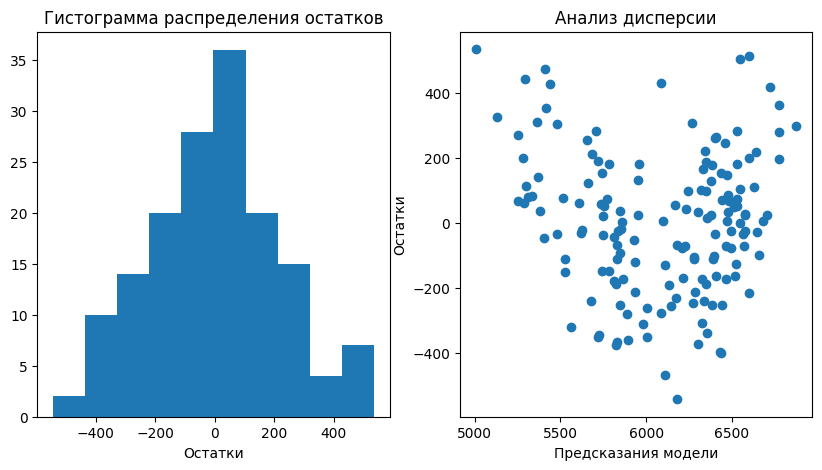

In [1597]:
residuals1 = y_test1 - predictions1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(x=residuals1)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
 
axes[1].scatter(x=predictions1, y=residuals1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Выводы: значение R^2 модели составляет 0,78, что неплохо, но не отлично. Анализ распределения остатков: остатки распределены более-менее симметрично, распределение близко к нормальному, заметных выбросов нет. А вот анализ дисперсии показывает "дугу" ("седло"), что может указывать на влияние нелинейности входных признаков на целевой (что был отмечено для "ЭКЕ" и "СПО"), то есть желательно устранить нелинейность**

### Обучение второй модели

Добавим в данные колонку для "СПО", преобразованную в категориальный бинарный признак по границе 0,91

In [1598]:
boundary= 0.91
bins = [-np.inf, boundary, np.inf] 
labels = ['низкий_спо', 'высокий_спо'] 
ferma_main_data['food_spr_cat'] = pd.cut(ferma_main_data['food_spr'], bins=bins, labels=labels)
ferma_main_data.head(10)

,cow_id,milk_yield_kg,food_efu,food_protein_gr,food_spr,cow_kind,grazing_type,cow_parent_kind,milk_fat_pct,milk_protein_pct,milk_taste,cow_age,food_spr_cat
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,низкий_спо
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,низкий_спо
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,низкий_спо
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,низкий_спо
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,низкий_спо
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет,низкий_спо
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,вкусно,более_2_лет,низкий_спо
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,вкусно,более_2_лет,высокий_спо
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет,высокий_спо
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет,низкий_спо


Добавим признак "ЭКЕ в квадрате" чтобы сгладить нелинейность зависимости удоя от признака "ЭКЕ"

In [1599]:
ferma_main_data['food_efu_sq']= ferma_main_data['food_efu']**2
ferma_main_data.head()

,cow_id,milk_yield_kg,food_efu,food_protein_gr,food_spr,cow_kind,grazing_type,cow_parent_kind,milk_fat_pct,milk_protein_pct,milk_taste,cow_age,food_spr_cat,food_efu_sq
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,низкий_спо,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,низкий_спо,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,низкий_спо,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,низкий_спо,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,низкий_спо,163.84


Отберем следующие признаки для обучения второй модели: "порода коровы", "порода папы коровы", "возраст коровы", "тип пастбища", "ЭКЕ в квадрате", "СПО (бинарный категорийный)", "сырой протеин". 

In [1600]:
X = ferma_main_data.drop(['milk_yield_kg','milk_fat_pct','milk_protein_pct', 'milk_taste', 'food_efu', 'food_spr'], axis=1)
y = ferma_main_data['milk_yield_kg']

Разделим данные на тренировочную и тестовую выборки

In [1601]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
display(X_train2.head())
display(X_test2.head())
display(y_train2.head())
y_test2.head() 

,cow_id,food_protein_gr,cow_kind,grazing_type,cow_parent_kind,cow_age,food_spr_cat,food_efu_sq
190,191,1966,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет,высокий_спо,275.56
210,211,1894,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,высокий_спо,268.96
139,140,1977,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,низкий_спо,198.81
271,272,1775,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет,низкий_спо,179.56
587,588,1671,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,низкий_спо,216.09


,cow_id,food_protein_gr,cow_kind,grazing_type,cow_parent_kind,cow_age,food_spr_cat,food_efu_sq
252,253,1945,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,низкий_спо,187.69
564,565,1662,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,низкий_спо,141.61
176,177,2082,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,высокий_спо,272.25
283,284,1732,Вис Бик Айдиал,Холмистое,Соверин,более_2_лет,низкий_спо,193.21
112,113,1715,Вис Бик Айдиал,Холмистое,Соверин,более_2_лет,высокий_спо,249.64


190    6420
210    6723
139    5833
271    5971
587    5610
Name: milk_yield_kg, dtype: int64

252    5754
564    5542
176    7141
283    5770
112    6345
Name: milk_yield_kg, dtype: int64

Закодируем категориальные признаки с помощью OneHotEncoder

In [1602]:
encoder2 = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['cow_kind', 'cow_parent_kind', 'grazing_type', 'cow_age', 'food_spr_cat']

# обучит и преобразуем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder2.fit_transform(X_train2[cat_col_names]) 
# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder2.transform(X_test2[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder2.get_feature_names_out() 

# создадим датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
display(X_train_ohe.head())
display(X_test_ohe.head())

,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо
0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0


Масштабируем количественные признаки с помощью StandardScaler

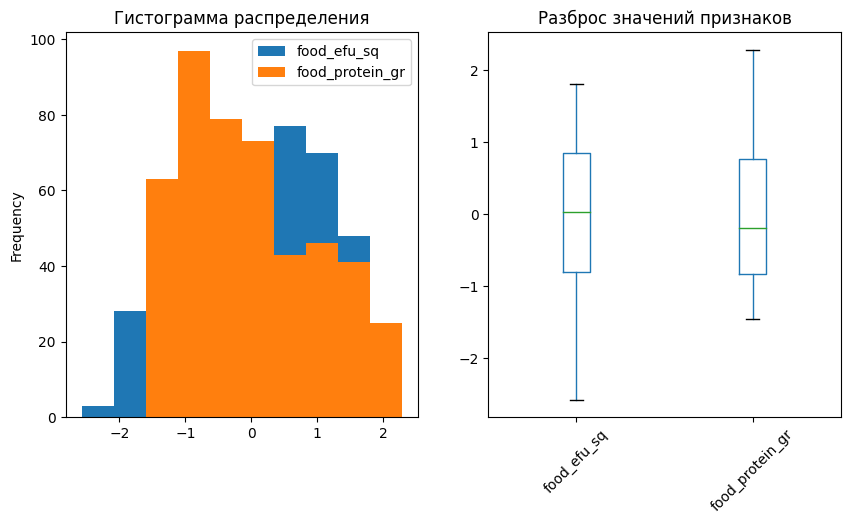

In [1603]:
num_col_names = ['food_efu_sq',	
                 'food_protein_gr']

scaler2 = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler2.fit_transform(X_train2[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler2.transform(X_test2[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train2 = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test2 = pd.concat([X_test_ohe, X_test_scaled], axis=1)
# построим графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами чтобы убедиться, что масштабирование прошло правильно
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train2[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train2[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Обучим модель линейной регрессии на подготовленных данных и рассчитаем метрику R^2

In [1604]:
# инициализируем модель линейной регрессии
model_lr2  = LinearRegression()

# обучим модель на тренировочных данных
model_lr2.fit(X_train2, y_train2) 

# получим предсказания модели на тестовых данных 
predictions2 = model_lr2.predict(X_test2) 

# рассчитаем значение R2 для линейной регрессии
r2_2 = r2_score(y_test2, predictions2)  

# выведем полученное значение R2
print("R2 LinearRegression =", r2_2)

R2 LinearRegression = 0.8347436421181885


Проанализируем остатки модели

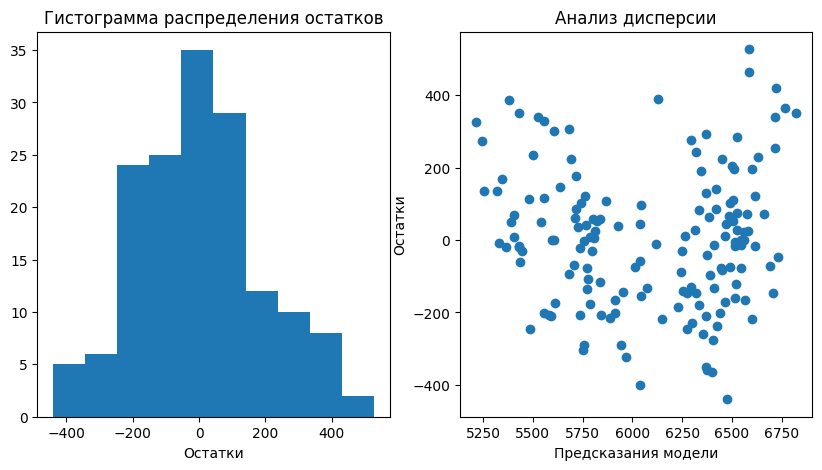

In [1605]:
# Анализ остатков
residuals2 = y_test2 - predictions2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(x=residuals2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
 
axes[1].scatter(x=predictions2, y=residuals2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Выводы: значение R^2 второй модели составляет 0,83, что лучше первой модели, но по прежнему не очень близко к 1. Анализ распределения остатков: остатки распределены более-менее симметрично, распределение близко к нормальному, заметных выбросов нет. Анализ дисперсии показывает более равномерный разброс, но в центре графика по прежнему меньше значений, чем по краям. Возможно, ситуацию удастся улучшить в третьей модели добавлением еще одного признака.**

### Обучение третьей модели

Объединим данные из таблиц ferma_main_data и ferma_dad_data для добавления признака "имя папы коровы"

In [1606]:
ferma_main_data= ferma_main_data.merge(ferma_dad_data, on='cow_id')
ferma_main_data.head()

,cow_id,milk_yield_kg,food_efu,food_protein_gr,food_spr,cow_kind,grazing_type,cow_parent_kind,milk_fat_pct,milk_protein_pct,milk_taste,cow_age,food_spr_cat,food_efu_sq,cow_parent_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,низкий_спо,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,низкий_спо,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,низкий_спо,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,низкий_спо,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,низкий_спо,163.84,Барин


Проверим, не возникли ли пропуски в результате слияния

In [1607]:
ferma_main_data.isna().sum()

cow_id              0
milk_yield_kg       0
food_efu            0
food_protein_gr     0
food_spr            0
cow_kind            0
grazing_type        0
cow_parent_kind     0
milk_fat_pct        0
milk_protein_pct    0
milk_taste          0
cow_age             0
food_spr_cat        0
food_efu_sq         0
cow_parent_name     0
dtype: int64

Отберем следующие признаки для обучения третьей модели: "порода коровы", "порода папы коровы", "возраст коровы", "тип пастбища", "ЭКЕ в квадрате", "СПО (бинарный категорийный)", "сырой протеин", "имя папы коровы"

In [1608]:
X = ferma_main_data.drop(['milk_yield_kg','milk_fat_pct','milk_protein_pct', 'milk_taste', 'food_efu', 'food_spr'], axis=1)
y = ferma_main_data['milk_yield_kg']

Разделим данные на тренировочную и тестовую выборки

In [1609]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
display(X_train3.head())
display(X_test3.head())
display(y_train3.head())
y_test3.head() 

,cow_id,food_protein_gr,cow_kind,grazing_type,cow_parent_kind,cow_age,food_spr_cat,food_efu_sq,cow_parent_name
188,191,1966,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет,высокий_спо,275.56,Барин
208,211,1894,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,высокий_спо,268.96,Буйный
137,140,1977,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,низкий_спо,198.81,Буйный
268,272,1775,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет,низкий_спо,179.56,Геркулес
581,588,1671,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,низкий_спо,216.09,Буйный


,cow_id,food_protein_gr,cow_kind,grazing_type,cow_parent_kind,cow_age,food_spr_cat,food_efu_sq,cow_parent_name
249,253,1945,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,низкий_спо,187.69,Барин
558,565,1662,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,низкий_спо,141.61,Барин
174,177,2082,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,высокий_спо,272.25,Геркулес
280,284,1732,Вис Бик Айдиал,Холмистое,Соверин,более_2_лет,низкий_спо,193.21,Барин
110,113,1715,Вис Бик Айдиал,Холмистое,Соверин,более_2_лет,высокий_спо,249.64,Барин


188    6420
208    6723
137    5833
268    5971
581    5610
Name: milk_yield_kg, dtype: int64

249    5754
558    5542
174    7141
280    5770
110    6345
Name: milk_yield_kg, dtype: int64

Закодируем категориальные признаки с помощью OneHotEncoder

In [1610]:
encoder3 = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['cow_kind', 'cow_parent_kind', 'grazing_type', 'cow_age', 'food_spr_cat', 'cow_parent_name']

# обучит и преобразуем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder3.fit_transform(X_train3[cat_col_names]) 
# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder3.transform(X_test3[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder3.get_feature_names_out() 

# создадим датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
display(X_train_ohe.head())
display(X_test_ohe.head())

,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо,cow_parent_name_Буйный,cow_parent_name_Геркулес,cow_parent_name_Соловчик
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо,cow_parent_name_Буйный,cow_parent_name_Геркулес,cow_parent_name_Соловчик
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Масштабируем количественные признаки с помощью StandardScaler

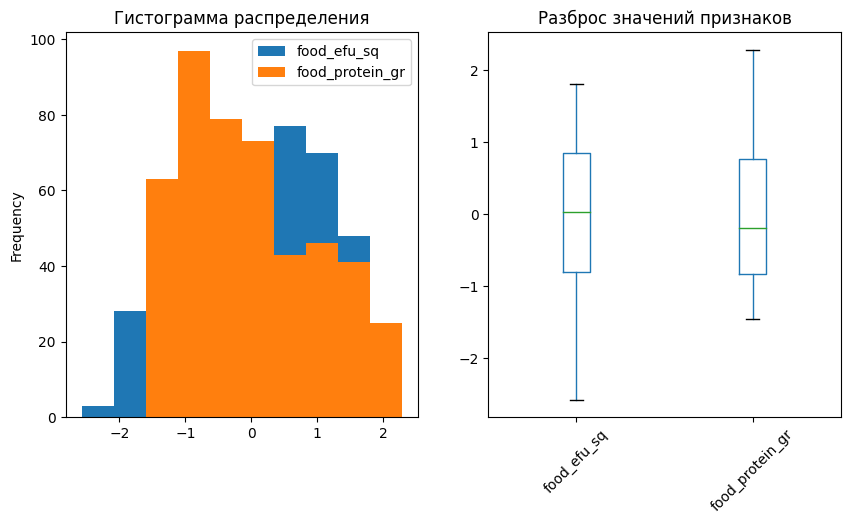

In [1611]:
num_col_names = ['food_efu_sq',	
                 'food_protein_gr']

scaler3 = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler3.fit_transform(X_train3[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler3.transform(X_test3[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train3 = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test3 = pd.concat([X_test_ohe, X_test_scaled], axis=1)
# построим графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами чтобы убедиться, что масштабирование прошло правильно
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train3[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train3[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Обучим модель линейной регрессии на подготовленных данных и рассчитаем метрику R^2

In [1612]:
# инициализируем модель линейной регрессии
model_lr3  = LinearRegression()

# обучим модель на тренировочных данных
model_lr3.fit(X_train3, y_train3) 

# получим предсказания модели на тестовых данных 
predictions3 = model_lr3.predict(X_test3) 

# рассчитаем значение R2 для линейной регрессии
r2_3 = r2_score(y_test3, predictions3)  

# выведем полученное значение R2
print("R2 LinearRegression =", r2_3)

R2 LinearRegression = 0.8413986635664519


Проанализируем остатки модели

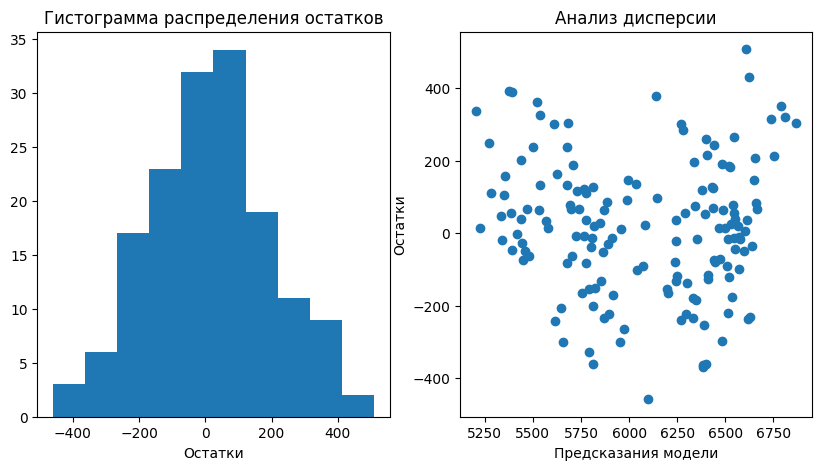

In [1613]:
# Анализ остатков
residuals3 = y_test3 - predictions3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(x=residuals3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
 
axes[1].scatter(x=predictions3, y=residuals3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Выводы: значение R^2 третьей модели составляет 0,84, что является лучшим результатом для трех моделей. Анализ распределения остатков: остатки распределены симметрично, распределение близко к нормальному, заметных выбросов нет. Анализ дисперсии показывает чуть более равномерный разброс по сравнению со второй моделью.**

#### Сравнение качества моделей

R2 LinearRegression 1 = 0.7832029531509055


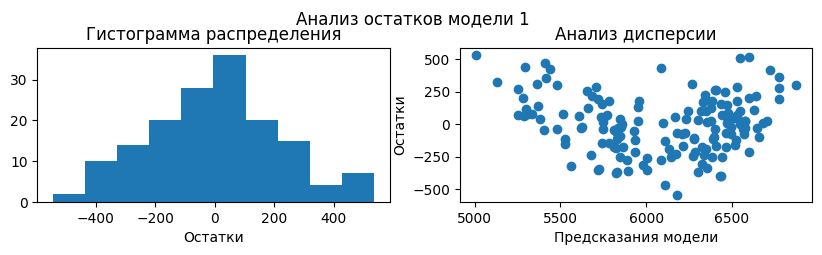

R2 LinearRegression 2 = 0.8347436421181885


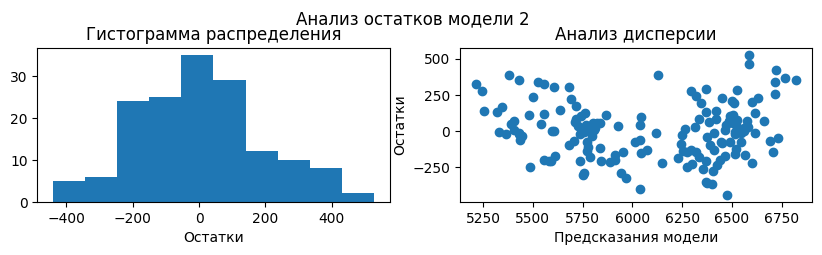

R2 LinearRegression 3 = 0.8413986635664519


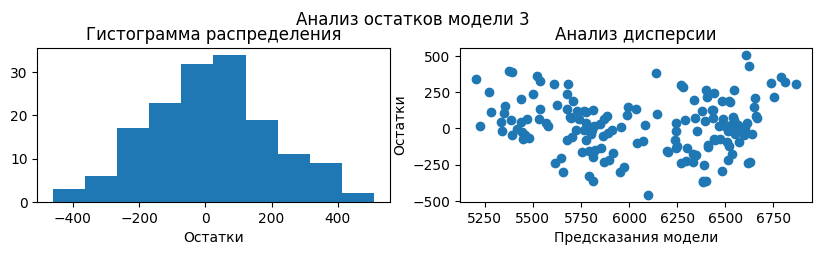

In [1614]:
r2_arr=[r2_1, r2_2, r2_3]
residuals_arr= [residuals1, residuals2, residuals3]
predictions_arr= [predictions1, predictions2, predictions3]
for i, (r2, residuals, predictions) in enumerate(zip(r2_arr, residuals_arr, predictions_arr)):
    print(f'R2 LinearRegression {i+1} = {r2}')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))
    axes[0].hist(x=residuals)
    axes[0].set_title('Гистограмма распределения')
    axes[0].set_xlabel('Остатки')
    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.suptitle(f'Анализ остатков модели {i+1}', va='bottom')
    plt.show()


**Вывод: третья модель является наиболее качественной как по наибольшему показателю R^2, так и по распределению остатков (распределение близко к нормальному, без выбросов, дисперсия распределена наиболее равномерно)**

#### Оценка качества моделей по метрикам MSE, MAE, RMSE

In [1615]:
y_test_arr= [y_test1, y_test2, y_test3]
df_metrics = pd.DataFrame(columns=['Model', 'R2', 'MAE', 'MSE', 'RMSE'])
for i, (r2, y_test, predictions) in enumerate(zip(r2_arr, y_test_arr, predictions_arr)):
    mae = mean_absolute_error(y_test, predictions) 
    mse = mean_squared_error(y_test, predictions) 
    rmse = mse ** 0.5
    new_row = {"Model" : 'LinearRegression '+ str(i+1), "R2" : r2, "MAE": mae, "MSE": mse, "RMSE": rmse}
    df_metrics = df_metrics.append(new_row, ignore_index=True)
df_metrics

,Model,R2,MAE,MSE,RMSE
0,LinearRegression 1,0.783203,173.801223,47499.999455,217.944946
1,LinearRegression 2,0.834744,149.719800,36207.490016,190.282658
2,LinearRegression 3,0.841399,146.716601,34749.381985,186.411861


**Вывод: лучшая модель по метрикам MAE, MSE, RMSE - третья так как значение этих метрик для нее наименьшее.**

In [1616]:
print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(predictions3), scale=st.sem(predictions3)))

95% доверительный интервал = (6003.6881255681255, 6141.703755012542)


**Вывод: 95% доверительный интервал = (6003.68, 6141.70)**

#### Прогноз удоя коров Экофермы

Добавим недостающие признаки ЭКЕ, сырой протеин,г и СПО на основе средних значений ferma_main_data, увеличенных на 5%

In [1617]:
cow_buy_data['food_efu']= ferma_main_data['food_efu'].median()*1.05
cow_buy_data['food_protein_gr']= ferma_main_data['food_protein_gr'].median()*1.05
cow_buy_data['food_spr']= ferma_main_data['food_spr'].median()*1.05
cow_buy_data.head()

,cow_kind,grazing_type,cow_parent_kind,cow_parent_name,milk_fat_pct,milk_protein_pct,cow_age,food_efu,food_protein_gr,food_spr
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,1982.4,0.9765
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,1982.4,0.9765
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,1982.4,0.9765
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.435,1982.4,0.9765
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.435,1982.4,0.9765


Чтобы использовать третью модель линейной регрессии, добавим соответствующий бинарный категорийный признак "СПО (категорийный)"

In [1618]:
boundary= 0.91
bins = [-np.inf, boundary, np.inf] 
labels = ['низкий_спо', 'высокий_спо'] 
cow_buy_data['food_spr_cat'] = pd.cut(cow_buy_data['food_spr'], bins=bins, labels=labels)
cow_buy_data.head()

,cow_kind,grazing_type,cow_parent_kind,cow_parent_name,milk_fat_pct,milk_protein_pct,cow_age,food_efu,food_protein_gr,food_spr,food_spr_cat
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,1982.4,0.9765,высокий_спо
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,1982.4,0.9765,высокий_спо
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,1982.4,0.9765,высокий_спо
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.435,1982.4,0.9765,высокий_спо
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.435,1982.4,0.9765,высокий_спо


Чтобы использовать третью модель линейной регрессии, добавим признак "ЭКЕ в квадрате" 

In [1619]:
cow_buy_data['food_efu_sq']= cow_buy_data['food_efu']**2
cow_buy_data.head()

,cow_kind,grazing_type,cow_parent_kind,cow_parent_name,milk_fat_pct,milk_protein_pct,cow_age,food_efu,food_protein_gr,food_spr,food_spr_cat,food_efu_sq
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225


Отберем признаки, соответствующие третьей модели

In [1620]:
X_buy = cow_buy_data.drop(['milk_fat_pct','milk_protein_pct','food_efu', 'food_spr'], axis=1)
X_buy.head()

,cow_kind,grazing_type,cow_parent_kind,cow_parent_name,cow_age,food_protein_gr,food_spr_cat,food_efu_sq
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,1982.4,высокий_спо,238.239225
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,1982.4,высокий_спо,238.239225
2,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,1982.4,высокий_спо,238.239225
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,1982.4,высокий_спо,238.239225
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,1982.4,высокий_спо,238.239225


Закодируем категориальные признаки с помощью OneHotEncoder

In [1621]:
# список всех категориальных признаков из выборки для покупки
cat_col_names = ['cow_kind', 'cow_parent_kind', 'grazing_type', 'cow_age', 'food_spr_cat', 'cow_parent_name']

# обучит и преобразуем категориальные признаки из выборки для покупки
X_buy_ohe = encoder3.transform(X_buy[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder3.get_feature_names_out() 

# создадим датафрейм из закодированных данных
X_buy_ohe = pd.DataFrame(X_buy_ohe, columns=encoder_col_names)
X_buy_ohe.head()

,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо,cow_parent_name_Буйный,cow_parent_name_Геркулес,cow_parent_name_Соловчик
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Масштабируем количественные признаки с помощью StandardScaler

In [1622]:
num_col_names = ['food_efu_sq',	
                 'food_protein_gr']

# обучим и трансформируем количественные признаки из выборки для покупки
X_buy_scaled = scaler3.transform(X_buy[num_col_names])

X_buy_scaled = pd.DataFrame(X_buy_scaled, columns=num_col_names)
X_buy= pd.concat([X_buy_ohe, X_buy_scaled], axis=1)
X_buy.head()

,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо,cow_parent_name_Буйный,cow_parent_name_Геркулес,cow_parent_name_Соловчик,food_efu_sq,food_protein_gr
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.626039,0.295239
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.626039,0.295239
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626039,0.295239
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.626039,0.295239
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.626039,0.295239


Получим предсказания модели на данных коров на продажу

In [1623]:
predictions_buy = model_lr3.predict(X_buy) 
print("Прогноз удоя для коров:", predictions_buy)

Прогноз удоя для коров: [6619.80219018 6368.65118962 6294.14173082 6609.66295856 6555.1684427
 6453.04876828 6619.80219018 6567.14566742 6294.14173082 6411.16848076
 6344.62461069 6651.54324608 6619.80219018 6113.01259536 6294.14173082
 6609.66295856 6344.62461069 6453.04876828 6567.14566742 6555.1684427 ]


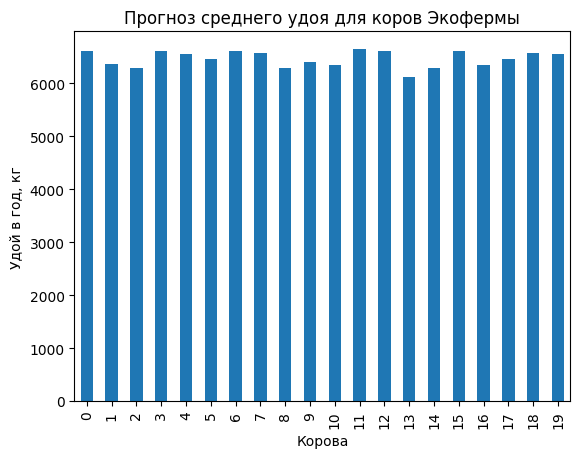

In [1624]:
lr_predictions_data= pd.DataFrame(data= np.array(predictions_buy), columns=['milk_yield_kg'])
lr_predictions_data.plot(kind='bar', legend=None)
plt.title('Прогноз среднего удоя для коров Экофермы')
plt.ylabel('Удой в год, кг')
plt.xlabel('Корова')
plt.show()

**Выводы: прогноз удоя для коров получен на основе третьей модели линейной регрессии. Судя по получившимся значениям фермер может выбрать любую из 20 коров так как их удой более 6000 кг в год (далее дело за вкусом молока)**

## Обучение модели логистической регрессии

Закодируем целевой признак "вкус молока" бинарной переменной (добавим новый столбец "milk_taste_bin")

In [1625]:
ferma_main_data['milk_taste_bin']= ferma_main_data['milk_taste'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_main_data.head()

,cow_id,milk_yield_kg,food_efu,food_protein_gr,food_spr,cow_kind,grazing_type,cow_parent_kind,milk_fat_pct,milk_protein_pct,milk_taste,cow_age,food_spr_cat,food_efu_sq,cow_parent_name,milk_taste_bin
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,низкий_спо,201.64,Буйный,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,низкий_спо,163.84,Соловчик,1
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,низкий_спо,196.00,Барин,0
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,низкий_спо,153.76,Буйный,0
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,низкий_спо,163.84,Барин,1


Отберем следующие признаки для обучения модели логистической регрессии: "порода коровы", "порода папы коровы", "возраст коровы", "тип пастбища", "ЭКЕ в квадрате", "СПО (бинарный категорийный)", "сырой протеин", "имя папы коровы","жирность молока,%", "белок,%"

In [1626]:
X = ferma_main_data.drop(['milk_yield_kg','milk_taste','milk_taste_bin','food_efu', 'food_spr'], axis=1)
y = ferma_main_data['milk_taste_bin']

Разделим данные на тренировочную и тестовую выборки

In [1627]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
display(X_train4.head())
display(X_test4.head())
display(y_train4.head())
y_test4.head() 

,cow_id,food_protein_gr,cow_kind,grazing_type,cow_parent_kind,milk_fat_pct,milk_protein_pct,cow_age,food_spr_cat,food_efu_sq,cow_parent_name
188,191,1966,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.077,более_2_лет,высокий_спо,275.56,Барин
208,211,1894,Вис Бик Айдиал,Равнинное,Айдиал,3.72,3.074,более_2_лет,высокий_спо,268.96,Буйный
137,140,1977,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.078,более_2_лет,низкий_спо,198.81,Буйный
268,272,1775,РефлешнСоверинг,Равнинное,Айдиал,3.63,3.071,более_2_лет,низкий_спо,179.56,Геркулес
581,588,1671,Вис Бик Айдиал,Равнинное,Айдиал,3.18,3.079,более_2_лет,низкий_спо,216.09,Буйный


,cow_id,food_protein_gr,cow_kind,grazing_type,cow_parent_kind,milk_fat_pct,milk_protein_pct,cow_age,food_spr_cat,food_efu_sq,cow_parent_name
249,253,1945,РефлешнСоверинг,Холмистое,Соверин,3.63,3.078,более_2_лет,низкий_спо,187.69,Барин
558,565,1662,Вис Бик Айдиал,Равнинное,Соверин,3.28,3.074,менее_2_лет,низкий_спо,141.61,Барин
174,177,2082,Вис Бик Айдиал,Холмистое,Айдиал,3.71,3.075,более_2_лет,высокий_спо,272.25,Геркулес
280,284,1732,Вис Бик Айдиал,Холмистое,Соверин,3.64,3.073,более_2_лет,низкий_спо,193.21,Барин
110,113,1715,Вис Бик Айдиал,Холмистое,Соверин,3.73,3.078,более_2_лет,высокий_спо,249.64,Барин


188    1
208    1
137    1
268    1
581    0
Name: milk_taste_bin, dtype: int64

249    1
558    0
174    1
280    0
110    1
Name: milk_taste_bin, dtype: int64

Закодируем категориальные признаки с помощью OneHotEncoder

In [1628]:
encoder4 = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['cow_kind', 'cow_parent_kind', 'grazing_type', 'cow_age', 'food_spr_cat', 'cow_parent_name']

# обучит и преобразуем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder4.fit_transform(X_train4[cat_col_names]) 
# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder4.transform(X_test4[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder4.get_feature_names_out() 

# создадим датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
display(X_train_ohe.head())
display(X_test_ohe.head())

,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо,cow_parent_name_Буйный,cow_parent_name_Геркулес,cow_parent_name_Соловчик
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо,cow_parent_name_Буйный,cow_parent_name_Геркулес,cow_parent_name_Соловчик
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Масштабируем количественные признаки с помощью StandardScaler

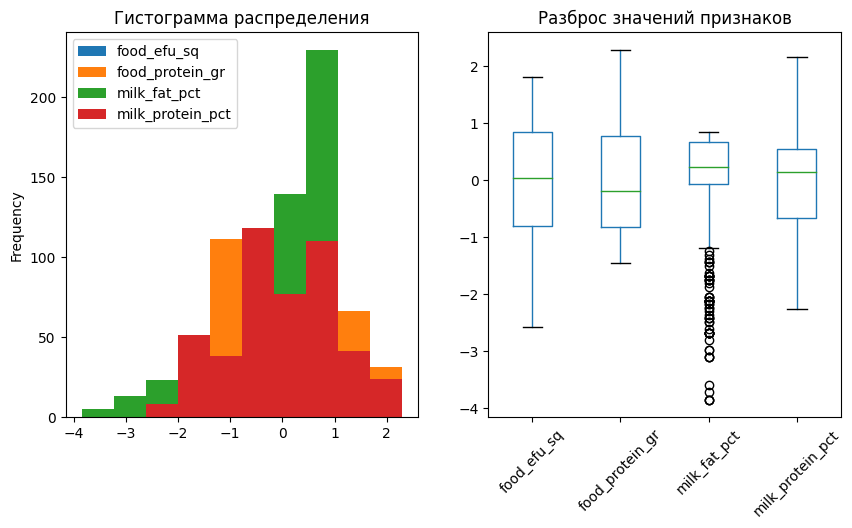

,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо,cow_parent_name_Буйный,cow_parent_name_Геркулес,cow_parent_name_Соловчик,food_efu_sq,food_protein_gr,milk_fat_pct,milk_protein_pct
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.626057,0.206082,0.727262,0.550740
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.449208,-0.185338,0.665466,-0.656751
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.430475,0.265882,-0.199680,0.953236
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.946283,-0.832267,0.109301,-1.864241
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.032546,-1.397651,-2.671524,1.355733


In [1629]:
num_col_names = ['food_efu_sq',	
                 'food_protein_gr',
                 'milk_fat_pct',
                 'milk_protein_pct']

scaler4 = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler4.fit_transform(X_train4[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler4.transform(X_test4[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train4 = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test4 = pd.concat([X_test_ohe, X_test_scaled], axis=1)
# построим графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами чтобы убедиться, что масштабирование прошло правильно
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train4[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train4[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()
X_train4.head()

Обучим модель линейной регрессии на подготовленных данных и рассчитаем accuracy, recall, precision, построим матрицу ошибок

Метрики качества модели
accuracy:  0.615
recall:  0.793
precision:  0.622


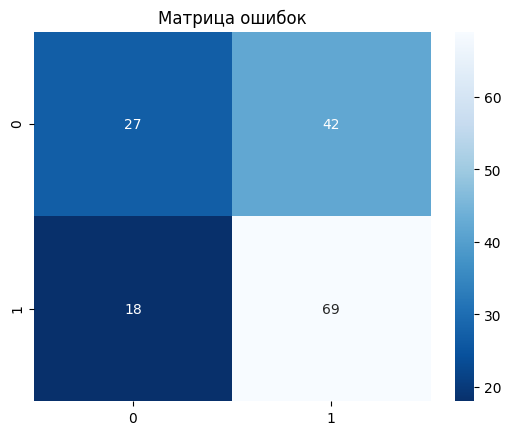

In [1630]:
# инициализируем модель логистической регрессии
model_clf = LogisticRegression()

# обучим модель на тренировочных данных
model_clf.fit(X_train4, y_train4) 

# получим предсказания модели на тестовых данных 
y_pred = model_clf.predict(X_test4) 

# постром матрицу ошибок
cm = confusion_matrix(y_test4, y_pred)
plt.title('Матрица ошибок')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

# рассчитаем метрики
print("Метрики качества модели")
accuracy = accuracy_score(y_test4, y_pred)
recall = recall_score(y_test4, y_pred)
precision = precision_score(y_test4, y_pred)

print('accuracy: ',round(accuracy ,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

### Анализ модели логистической регрессии

**Критичнее всего при покупке коров для фермера ошибка первого рода, так как более важно не допустить покупки коровы с невкусным молоком, чем принять ложное решение о том, что молоко еще одной коровы невкусное, когда оно на самом деле вкусное. То есть требуется максимизировать метрику "Precision".**

Изменим порог принадлежности к классам, чтобы свести ошибку "False Positive" к нулю и максимизировать метрику "Precision"

In [1631]:
y_proba = model_clf.predict_proba(X_test4)[:,1]

metrics_data = pd.DataFrame(zip(y_test4, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

metrics_data.head()

,y_valid,y_proba
32,1,0.874847
112,1,0.859505
115,1,0.857683
26,1,0.855367
83,1,0.852417


In [1632]:
# пороговые значения классификации
clf_thresholds = [round(i,2) for i in np.linspace(0.69, 0.84, num = 15, endpoint=False)]
print(f'Пороговые значения классификации: {clf_thresholds}') 
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in clf_thresholds:
	columns.append('y_pred_'+str(i))
	metrics_data['y_pred_'+str(i)] = metrics_data['y_proba'].apply(lambda x: 0 if x<i else 1)

metrics_data.sample(5)

Пороговые значения классификации: [0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83]


,y_valid,y_proba,y_pred_0.69,y_pred_0.7,y_pred_0.71,y_pred_0.72,y_pred_0.73,y_pred_0.74,y_pred_0.75,y_pred_0.76,y_pred_0.77,y_pred_0.78,y_pred_0.79,y_pred_0.8,y_pred_0.81,y_pred_0.82,y_pred_0.83
109,1,0.465263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143,0,0.449611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
116,0,0.493030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.816396,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
46,1,0.661870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Расчет метрик для различных пороговых значений

In [1633]:
df_clf_metrics = pd.DataFrame(columns=['Пороговое значение', 'Позитивных предсказаний', 'Precision', 'Recall'])
for i in clf_thresholds:
    positive_sum= metrics_data['y_pred_'+str(i)].sum()
    precision = precision_score(metrics_data['y_valid'], metrics_data['y_pred_'+str(i)], zero_division=1)
    recall = recall_score(metrics_data['y_valid'], metrics_data['y_pred_'+str(i)], zero_division=0)
    new_row = {"Пороговое значение" : i, "Позитивных предсказаний" : positive_sum, "Precision": precision, "Recall": recall}
    df_clf_metrics = df_clf_metrics.append(new_row, ignore_index=True)
df_clf_metrics.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Пороговое значение,0.69000,0.700000,0.710000,0.720000,0.730000,0.740000,0.750000,0.760000,0.770000,0.780000,0.790000,0.800000,0.810000,0.820000,0.830000
Позитивных предсказаний,44.00000,41.000000,37.000000,32.000000,30.000000,29.000000,28.000000,25.000000,22.000000,20.000000,17.000000,14.000000,12.000000,10.000000,8.000000
Precision,0.75000,0.756098,0.756757,0.812500,0.833333,0.862069,0.892857,0.960000,0.954545,0.950000,0.941176,0.928571,1.000000,1.000000,1.000000
Recall,0.37931,0.356322,0.321839,0.298851,0.287356,0.287356,0.287356,0.275862,0.241379,0.218391,0.183908,0.149425,0.137931,0.114943,0.091954


**Вывод: при пороговом значении 0,81 метрика "Precision"=1 (количество ложноположительных предсказаний сведено к 0). Далее требуется сделать предсказание вкуса молока для выборки коров Экофермы, используя значение, минимизирующее риск получения невкусного молока. Так как для большой выборки даже значение вероятности класса равное 99% может иметь ложноположительные предсказания (precision<1), то имеет смысл в качестве порогового значения использовать значение, выдающее максимальную точность (но не 1). В данном случае, это значение =0,76. При этом имеем максимальное значение precision равное 0,96 (при этом вероятность, что молоко выбранной коровы будет невкусным, составляет всего 4%, а значение метрики recall = 0.28).**

### Предсказание вкуса молока для коров экофермы

Выполним подготовку данных

Отберем признаки, соответствующие модели классификации

In [1634]:
X_buy_clf = cow_buy_data.drop(['food_efu', 'food_spr'], axis=1)
X_buy_clf.head()

,cow_kind,grazing_type,cow_parent_kind,cow_parent_name,milk_fat_pct,milk_protein_pct,cow_age,food_protein_gr,food_spr_cat,food_efu_sq
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,1982.4,высокий_спо,238.239225
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,1982.4,высокий_спо,238.239225
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,1982.4,высокий_спо,238.239225
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,1982.4,высокий_спо,238.239225
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,1982.4,высокий_спо,238.239225


Закодируем категориальные признаки с помощью OneHotEncoder

In [1635]:
# список всех категориальных признаков из выборки для покупки
cat_col_names = ['cow_kind', 'cow_parent_kind', 'grazing_type', 'cow_age', 'food_spr_cat', 'cow_parent_name']

# обучит и преобразуем категориальные признаки из выборки для покупки
X_buy_ohe = encoder4.transform(X_buy_clf[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder4.get_feature_names_out() 

# создадим датафрейм из закодированных данных
X_buy_ohe = pd.DataFrame(X_buy_ohe, columns=encoder_col_names)
X_buy_ohe.head()

,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо,cow_parent_name_Буйный,cow_parent_name_Геркулес,cow_parent_name_Соловчик
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Масштабируем количественные признаки с помощью StandardScaler

In [1636]:
num_col_names = ['food_efu_sq',	
                 'food_protein_gr',
                 'milk_fat_pct',
                 'milk_protein_pct']

# обучим и трансформируем количественные признаки из выборки для покупки
X_buy_scaled = scaler4.transform(X_buy_clf[num_col_names])

X_buy_scaled = pd.DataFrame(X_buy_scaled, columns=num_col_names)
X_buy_clf= pd.concat([X_buy_ohe, X_buy_scaled], axis=1)
X_buy_clf.head()

,cow_kind_РефлешнСоверинг,cow_parent_kind_Соверин,grazing_type_Холмистое,cow_age_менее_2_лет,food_spr_cat_низкий_спо,cow_parent_name_Буйный,cow_parent_name_Геркулес,cow_parent_name_Соловчик,food_efu_sq,food_protein_gr,milk_fat_pct,milk_protein_pct
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.626039,0.295239,-0.199680,0.148243
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.626039,0.295239,-0.446864,2.160727
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626039,0.295239,-0.137883,-0.656751
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.626039,0.295239,-1.312010,-5.889209
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.626039,0.295239,0.171097,-0.656751


Получим предсказания модели на данных коров на продажу для порогового значения по умолчанию

In [1637]:
predictions_buy_clf = model_clf.predict(X_buy_clf) 
print("Прогноз получения вкусного молока для коров:", predictions_buy_clf)

Прогноз получения вкусного молока для коров: [1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1]


In [1638]:
y_proba_buy = model_clf.predict_proba(X_buy_clf)[:,1]
y_proba_buy_data = pd.DataFrame(data= y_proba_buy, columns = ['y_proba']).sort_values(by='y_proba',ascending=False)

y_proba_buy_data.T

,13,9,0,6,1,16,7,2,14,8,19,4,15,18,11,3,10,12,17,5
y_proba,0.709664,0.701797,0.694931,0.694931,0.671761,0.665989,0.662953,0.538053,0.538053,0.538053,0.536726,0.536726,0.500799,0.482199,0.450227,0.434289,0.28591,0.240624,0.166902,0.16034


In [1639]:
taste_threshold=0.76
y_proba_buy_data['y_pred_taste_threshold'] = y_proba_buy_data['y_proba'].apply(lambda x: 0 if x<taste_threshold else 1)
sum_val= y_proba_buy_data['y_pred_taste_threshold'].sum()
print(f'Количество коров с вкусным молоком согласно оптимальному значению порога классификации: {sum_val}')
y_proba_buy_data.T

Количество коров с вкусным молоком согласно оптимальному значению порога классификации: 0


,13,9,0,6,1,16,7,2,14,8,19,4,15,18,11,3,10,12,17,5
y_proba,0.709664,0.701797,0.694931,0.694931,0.671761,0.665989,0.662953,0.538053,0.538053,0.538053,0.536726,0.536726,0.500799,0.482199,0.450227,0.434289,0.28591,0.240624,0.166902,0.16034
y_pred_taste_threshold,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000


In [1640]:
# добавим столбцы с новыми предсказаниями в таблицу
for i in clf_thresholds:
	y_proba_buy_data['y_pred_'+str(i)] = y_proba_buy_data['y_proba'].apply(lambda x: 0 if x<i else 1)

y_proba_buy_data.sample(5)

,y_proba,y_pred_taste_threshold,y_pred_0.69,y_pred_0.7,y_pred_0.71,y_pred_0.72,y_pred_0.73,y_pred_0.74,y_pred_0.75,y_pred_0.76,y_pred_0.77,y_pred_0.78,y_pred_0.79,y_pred_0.8,y_pred_0.81,y_pred_0.82,y_pred_0.83
3,0.434289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0.500799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,0.482199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.536726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.671761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1641]:
df_clf_predicts = pd.DataFrame(columns=['Пороговое значение', 'Позитивных предсказаний'])
for i in clf_thresholds:
    positive_sum= y_proba_buy_data['y_pred_'+str(i)].sum()
    precision = precision_score(metrics_data['y_valid'], metrics_data['y_pred_'+str(i)], zero_division=1)
    recall = recall_score(metrics_data['y_valid'], metrics_data['y_pred_'+str(i)], zero_division=0)
    new_row = {"Пороговое значение" : i, "Позитивных предсказаний" : positive_sum, "Precision": precision, "Recall": recall}
    df_clf_predicts = df_clf_predicts.append(new_row, ignore_index=True)
df_clf_predicts.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Пороговое значение,0.69000,0.700000,0.710000,0.720000,0.730000,0.740000,0.750000,0.760000,0.770000,0.780000,0.790000,0.800000,0.810000,0.820000,0.830000
Позитивных предсказаний,4.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Precision,0.75000,0.756098,0.756757,0.812500,0.833333,0.862069,0.892857,0.960000,0.954545,0.950000,0.941176,0.928571,1.000000,1.000000,1.000000
Recall,0.37931,0.356322,0.321839,0.298851,0.287356,0.287356,0.287356,0.275862,0.241379,0.218391,0.183908,0.149425,0.137931,0.114943,0.091954


**Вывод: согласно модели, фермер не может купить коров на экоферме без риска получить невкусное молоко, так как коров, соответствующих пороговому значению вероятности 0,76, минимизирующему риск ложноположительных предсказаний до 4%, нет. Если взять более низкое пороговое значение (0,7), то можно купить 2 коровы, при этом значение метрики "Precision" составляет 0.76 (шанс получить невкусное молоко 24%, то есть чуть менее 1 к 4).**

## Итоговые выводы

Добавим прогноз вкуса молока (для порогового значения 0,7) и удоя коров «ЭкоФермы» в датафрейм, описывающий коров, покупку которых рассматривает фермер. 

In [1646]:
cow_buy_data['milk_taste_proba']=y_proba_buy_data['y_proba']
chosen_taste_threshold=0.7
cow_buy_data['milk_taste']= y_proba_buy_data['y_pred_'+ str(chosen_taste_threshold)].apply(lambda x: "вкусно" if x==1 else "не вкусно")
cow_buy_data['milk_yield_kg']= lr_predictions_data['milk_yield_kg']
cow_buy_data.head()

,cow_kind,grazing_type,cow_parent_kind,cow_parent_name,milk_fat_pct,milk_protein_pct,cow_age,food_efu,food_protein_gr,food_spr,food_spr_cat,food_efu_sq,milk_taste_proba,milk_taste,milk_yield_kg,buy_or_not
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.694931,не вкусно,6619.802190,нет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.671761,не вкусно,6368.651190,нет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.538053,не вкусно,6294.141731,нет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.434289,не вкусно,6609.662959,нет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.536726,не вкусно,6555.168443,нет


Добавим колонку "buy_or_not" с рекомендацией, покупать или нет определенную корову.Ранжируем их по вероятности получения вкусного молока чтоб
можно было задав другое пороговое значение отобрать нужное количество коров.

In [1647]:
def decide_to_buy_or_not(taste, milk_yield):
    if taste=="вкусно" and milk_yield>6000:
        return "да"
    else:
        return "нет"
    
cow_buy_data['buy_or_not']= cow_buy_data.apply(lambda x: decide_to_buy_or_not(x.milk_taste, x.milk_yield_kg), axis=1)
cow_buy_data.sort_values('milk_taste_proba', ascending=False) 

,cow_kind,grazing_type,cow_parent_kind,cow_parent_name,milk_fat_pct,milk_protein_pct,cow_age,food_efu,food_protein_gr,food_spr,food_spr_cat,food_efu_sq,milk_taste_proba,milk_taste,milk_yield_kg,buy_or_not
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.709664,вкусно,6113.012595,да
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.701797,вкусно,6411.168481,да
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.694931,не вкусно,6619.802190,нет
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.694931,не вкусно,6619.802190,нет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.671761,не вкусно,6368.651190,нет
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.665989,не вкусно,6344.624611,нет
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.662953,не вкусно,6567.145667,нет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.538053,не вкусно,6294.141731,нет
14,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.538053,не вкусно,6294.141731,нет
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,1982.4,0.9765,высокий_спо,238.239225,0.538053,не вкусно,6294.141731,нет


Посчитаем суммарное количество подходящих для покупки коров с минимальным риском

In [1648]:
cows_to_buy= cow_buy_data[cow_buy_data['buy_or_not']=="да"]['buy_or_not'].count()
f'С минимальным риском можно купить {cows_to_buy} коров'

'С минимальным риском можно купить 2 коров'

**Выводы по результатам моделирования для фермера: с минимальным риском получения вкусного молока можно купить 2 коров. При этом удой полностью соответствует требованиям получения более 6000 кг молока в год, а вот шансы получить невкусное молоко чуть менее 1 к 4 (24%). Так как совсем без риска получить невкусное молоко коров выбрать не получается, можно, используя ранжированный по вероятности получения вкусного молока список, выбрать нужное количество коров, и просить соответствующую скидку, которая поможет компенсировать риск.**

**Выводы о моделях линейной и логистической регрессии: в модели линейной регрессии использовали способы устранения нелинейности возведением значений исходного признака в квадрат, а также переход от числового признака к категориальному, также чтобы устранить нелинейность связи с целевым признаком. Кроме того, наглядно видно на трех моделях линейной регрессии, как добавление в модель релевантных признаков улучшает качество прогнозирования.**

**Ответ на вопрос "Возможно ли ещё улучшить результаты регрессионной модели?": можно было бы попробовать исключить из модели входные признаки, имеющие слабую корреляцию с целевым признаком. Пробовал это сделать с содержанием сырого протеина в корме, показатели получились чуть хуже. Но возможно, есть еще варианты для других признаков.**

**Ответ на вопрос: "Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?": в зависимости от задачи, более важной может быть как метрика точности модели (precision), так и метрика полноты (recall). В случае с задачей этого проекта было важнее получить миниальное количество ложноположительных результатов. Но возможна и другая постановка задачи, например, когда более важен охват аудитории, соответствующей определенным целевым признакам.**